<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bank = pd.read_csv("/content/drive/MyDrive/Neural Networks 1/Project/bank-1.csv")

## Data Overview

In [4]:
#display first 5 rows
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#display last 5 rows
bank.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Copy the data set

In [6]:
data = bank.copy()

 Shape of the data set





In [7]:
data.shape
#print numbers of rows and columns
print("The data set has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The data set has 10000 rows and 14 columns


The data set has 10000 rows and 14 columns

### Check the data types

In [8]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# print columns with numerical and object data type
print (data.dtypes[data.dtypes == 'object'].index)
print (data.dtypes[data.dtypes != 'object'].index)

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


There are 3 columns with object (String) data and Other 11 columns have numerical values

No missing data as per the above command

### Check for Duplicate rows

In [10]:
# checking for duplicate values
data.duplicated().sum()

0

No duplicated *rows*

### Check for Statistical Summary

In [11]:
#statisctical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Credit Score varies from 350 to 850 with a mean of 650
age of Customers vary from 18 to 92 years

Customer's Tenure with bank are from 0 to 10 years maximum.

Bank balance for the customers vary from 0 to 250898.09.
50% of customers have balance below 97198. There could be outliers in the data and is right skewed.

Customers usually have one product to up to 4 products from the bank.

Salary Ranges from 11.58 to 199992.48 for the customers. The value shows huge variation and could be many outliers.

In [12]:
#find numbers of customers who have Credit cards
data['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945



7055 has Credit Card with the bank and 2945 doenst have.

In [13]:
#find number of customers who are active
data['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


There are 5151 active members and 4849 inactive customers for the bank

In [14]:
#Statistical summary for String data
data.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Majority of the Customers are from France Geography - 5014 number

Male customer numbers are 5457 and they are the dominating gender for the data

Dropping columns which doesnt add value. RowNumber, CustomerId, Surname are columns which dont have any value add

In [15]:
# drop Surname, RowNumber, CustomerId
data.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
# find unique values and counts for geography and gender
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


There are 3 Geography values - France, Germany and Spain

Gender has 2 values - Male and Female

## Exploratory Data Analysis

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [22]:
#Define function to plot with Percentage

def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

#### Observations on CreditScore

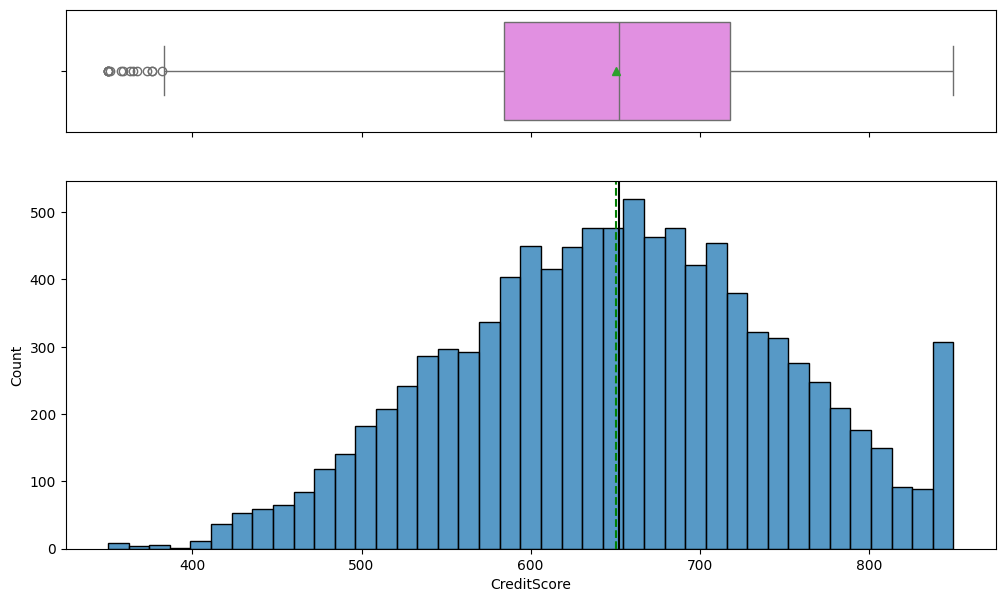

In [23]:
histogram_boxplot(data,'CreditScore')

Credit Score has outliers for the lower end. This is a real scenario where customers can have low credit score

#### Observations on Age

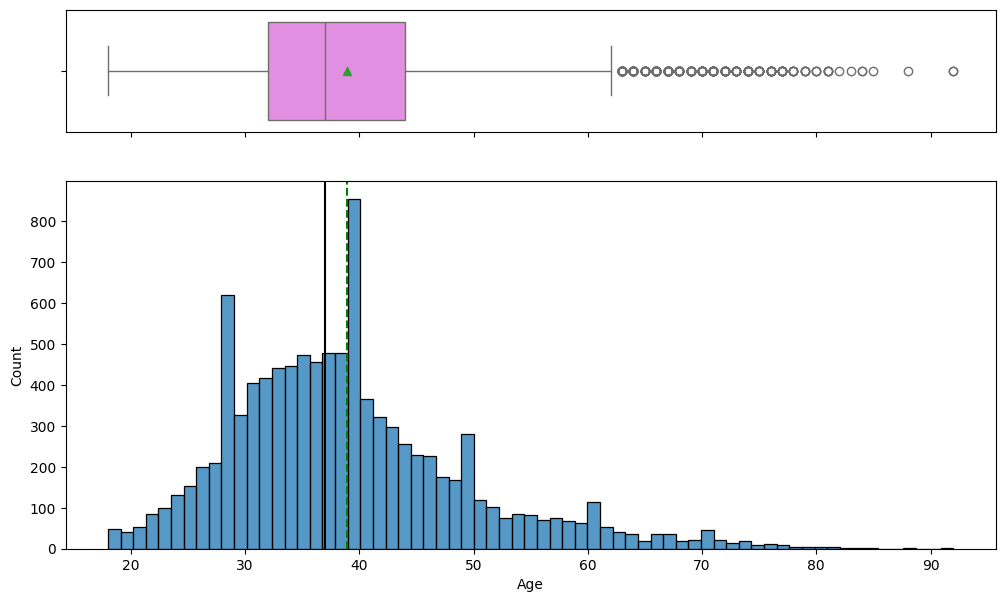

In [24]:
histogram_boxplot(data,'Age')

Average customer age seems to be 38 years.

There are few customers who are very old and seems to add to the outliers

#### Observations on Balance

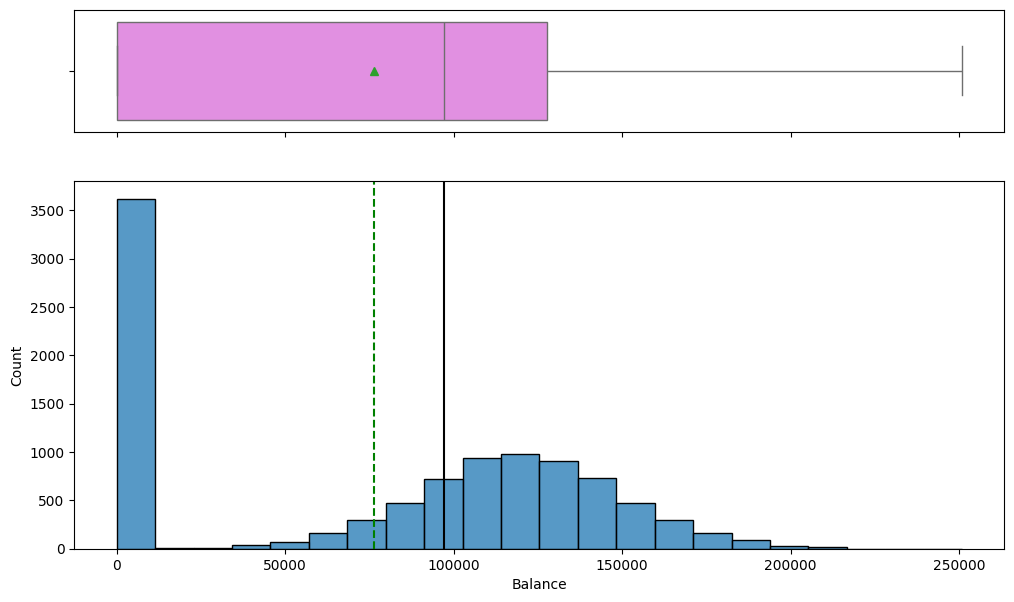

In [25]:
histogram_boxplot(data,'Balance')

50% of customers have balance below 10,000. But there are some customers have value above 200000.

Many customers have balance of 0.

#### Observations on Estimated Salary

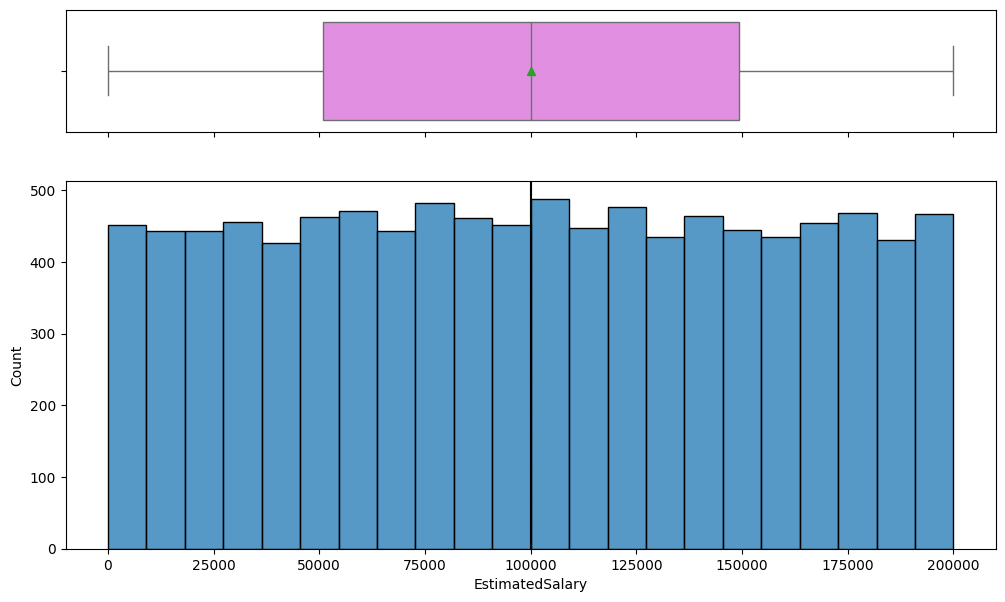

In [26]:
histogram_boxplot(data,'EstimatedSalary')

Estimated Salary seems like a uniform distribution with values ranging from 0 to 200000

#### Observations on Exited

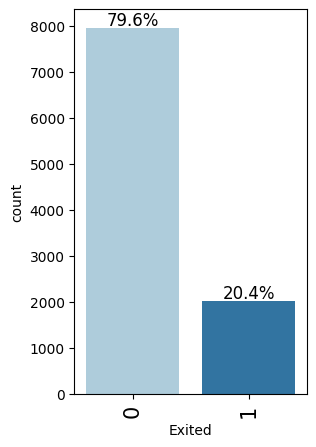

In [27]:
labeled_barplot(data, "Exited", perc=True)

79.6% of Customers have not exited the bank and 20.4 % customers exited the bank.

#### Observations on Geography

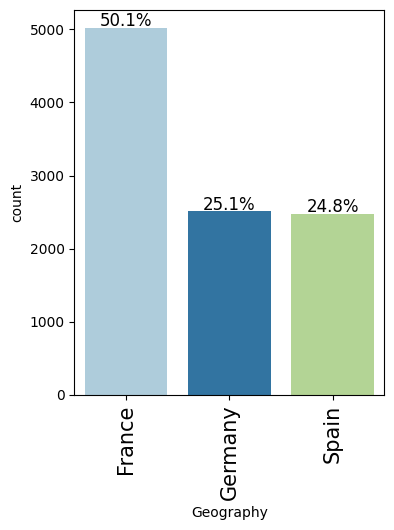

In [28]:
labeled_barplot(data, "Geography", perc=True)

50 % of customers are from France and 25 % each from Germany and Spain

#### Observations on Gender

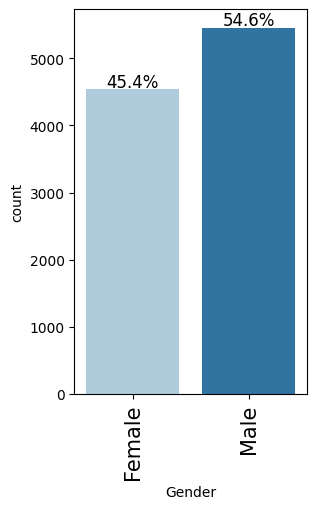

In [29]:
labeled_barplot(data, "Gender", perc=True)

55 % of customers are Male and only 45 % are female

#### Observations on Tenure

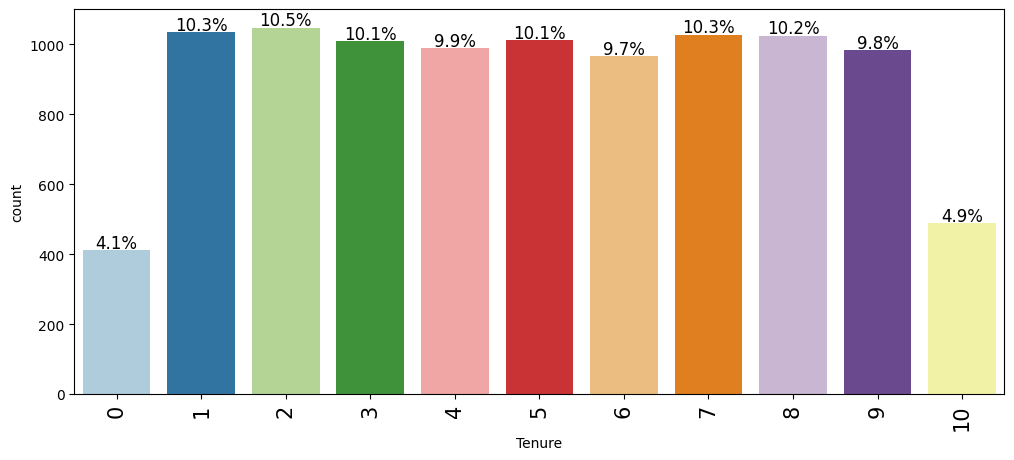

In [30]:
labeled_barplot(data, "Tenure", perc=True)


Tenure with the bank has values from 0 10 10.

Lowest number of customers are new with 0 years Tenure.

There are nearly 5% of customers with 10 years tenure with the bank.

Other year data is nearly uniform for 1 to 9 years.

#### Observations on Number of Products

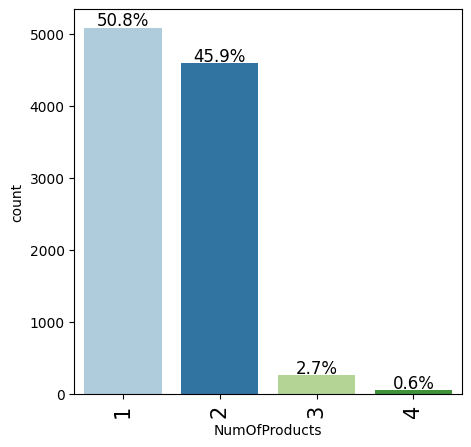

In [31]:
labeled_barplot(data, "NumOfProducts", perc=True)

50.8% of customers have one Product with the bank.

45.9% of customers have 2 products from the bank.

2.7% have 3 products and only 0.6 % have 4 products from the bank.

#### Observations on Has Credit Card

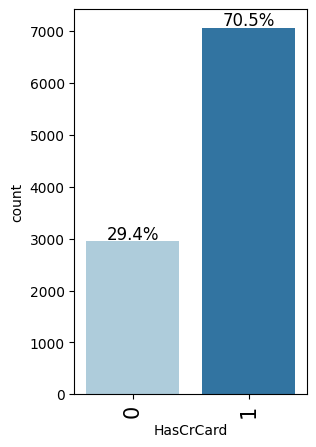

In [32]:
labeled_barplot(data, "HasCrCard", perc=True)

70.5 % of customers have credit card. Only 29.4 % of customers doesnt have credit card with the bank.

#### Observations on Is Active Member

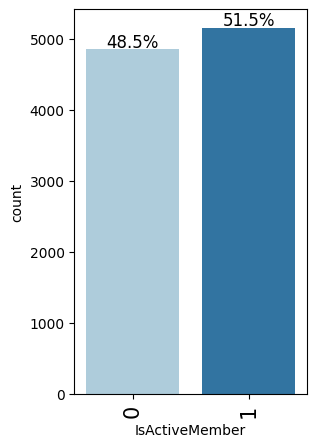

In [33]:
labeled_barplot(data, "IsActiveMember", perc=True)

51.5 % of customers are active members and 48.5 % of customers are not active.

### Bivariate Analysis

Heat Map - Correlation between  Numerical columns

In [34]:
# list numerical columns
num_cols = ['CreditScore','Age','Balance','EstimatedSalary','Tenure']

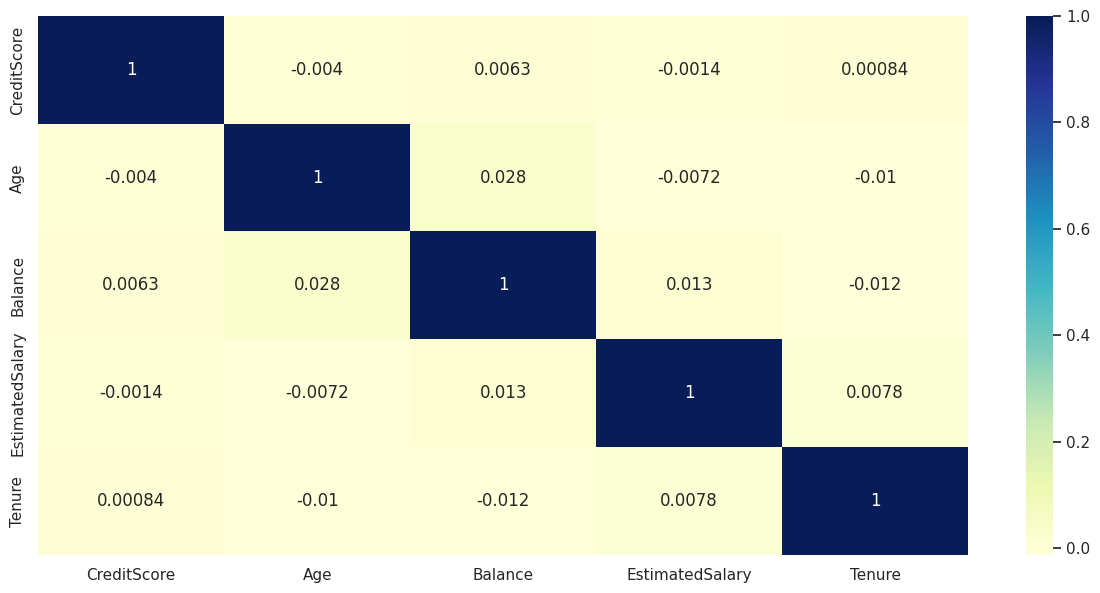

In [35]:
# heatmap
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(data[num_cols].corr(),annot=True,cmap='YlGnBu')
plt.show()

We are NOT observing any significant correlation between the numerical non categorical parameters

#### Exited Vs Geography

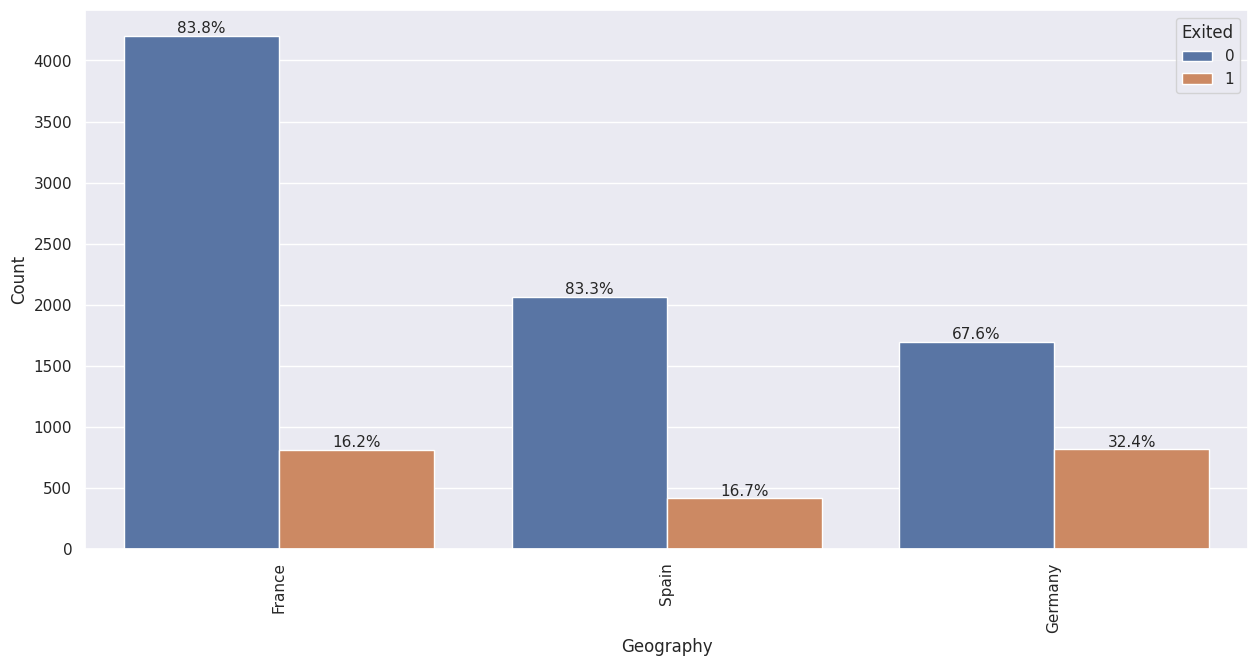

In [36]:
ax3 = sns.countplot(x="Geography", hue="Exited", data=data)
ax3.set(xlabel='Geography', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

32.4% of Customers from Germany have exited.

Nearly 16 % of customers from France and Spain have exited.

#### Exited Vs Gender

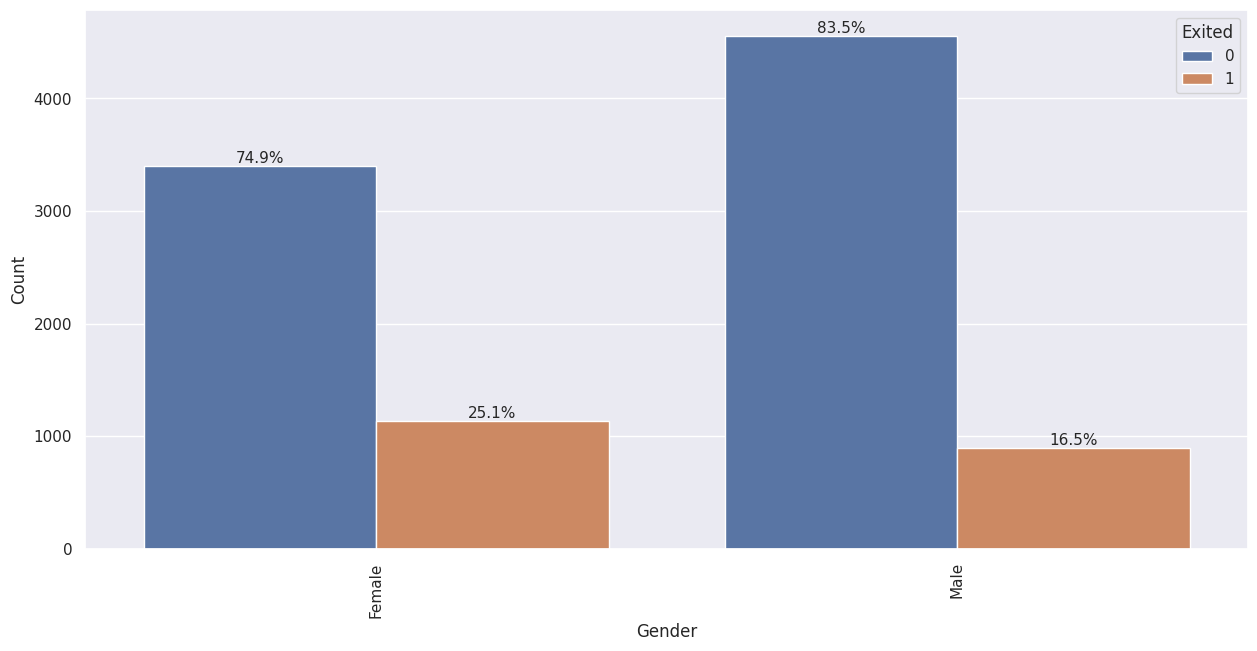

In [37]:
ax3 = sns.countplot(x="Gender", hue="Exited", data=data)
ax3.set(xlabel='Gender', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

25 % of Female Customers have exited as compared to 16.5 % of the Male customers

#### Exited Vs Has Credit Card

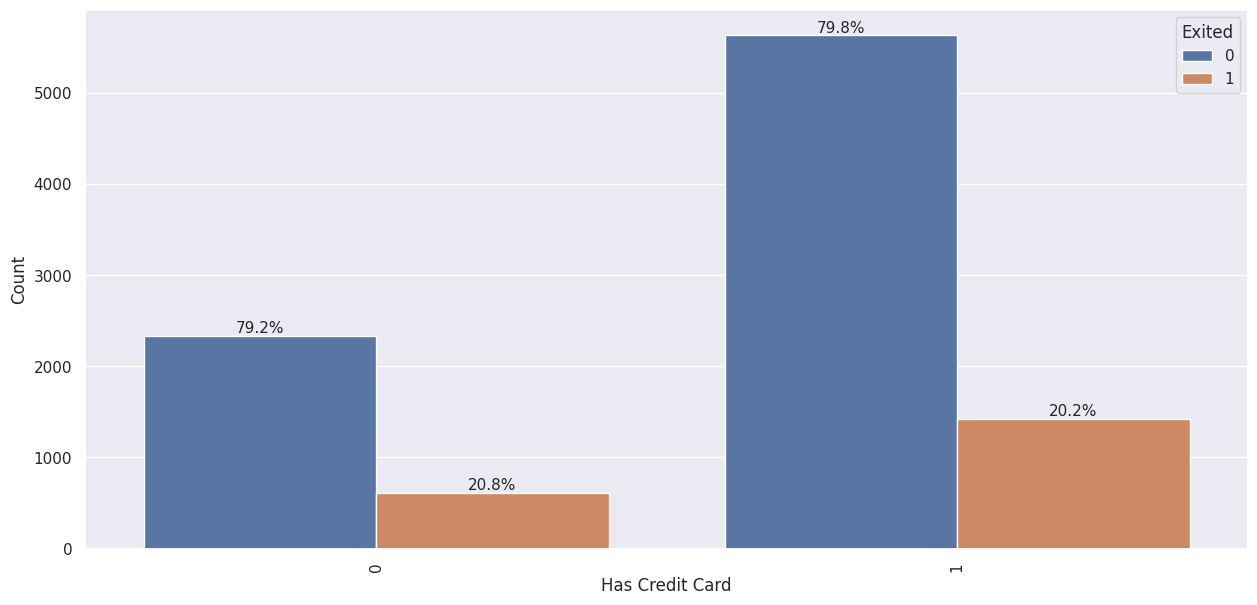

In [38]:
ax3 = sns.countplot(x="HasCrCard", hue="Exited", data=data)
ax3.set(xlabel='Has Credit Card', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

More Customers have Credit Card. Nearly 20% of customers have exited irrespective of the fact that they have a credit card or not.

#### Exited Vs Is active member

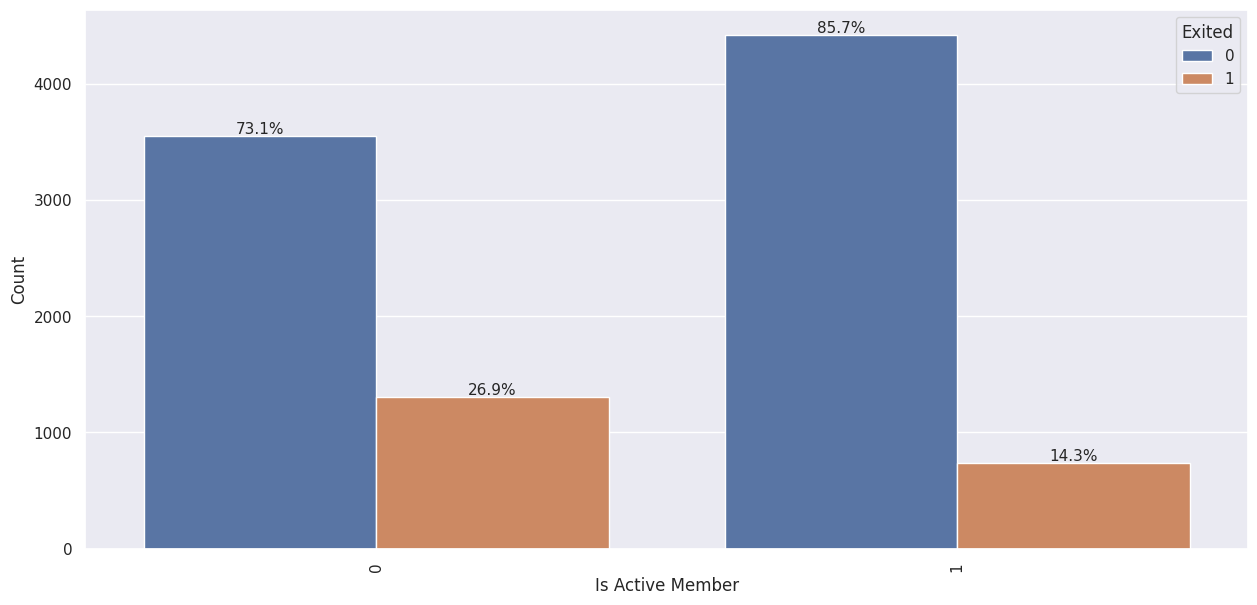

In [39]:
ax3 = sns.countplot(x="IsActiveMember", hue="Exited", data=data)
ax3.set(xlabel='Is Active Member', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

26.9% of Customers who are not Active have exited as compared to 14.3 % exited for customers who are active

#### Exited Vs Tenure

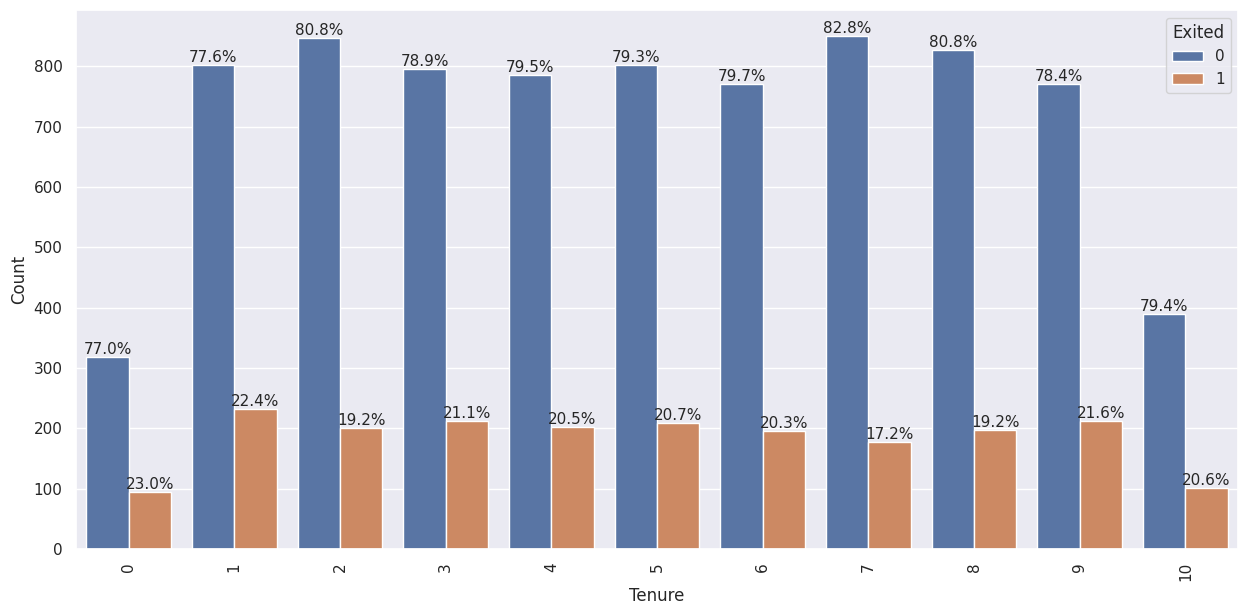

In [40]:
ax3 = sns.countplot(x="Tenure", hue="Exited", data=data)
ax3.set(xlabel='Tenure', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

Tenure and Exited seems to have same data ireesptive of change in tenure years

#### Exited Vs Number of Products

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


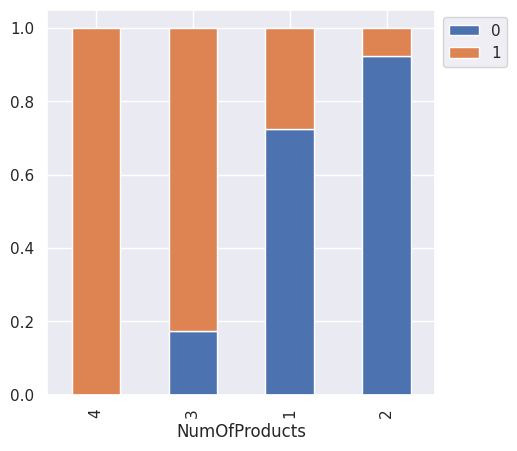

In [41]:
stacked_barplot(data, "NumOfProducts", "Exited" )

All Customers with 4 products have exited.

80% of customers with 3 products have exited.

30% of customers with 2 products have exited.

5% of customers who use one product from bank have exited.

#### Exited Vs Credit Score

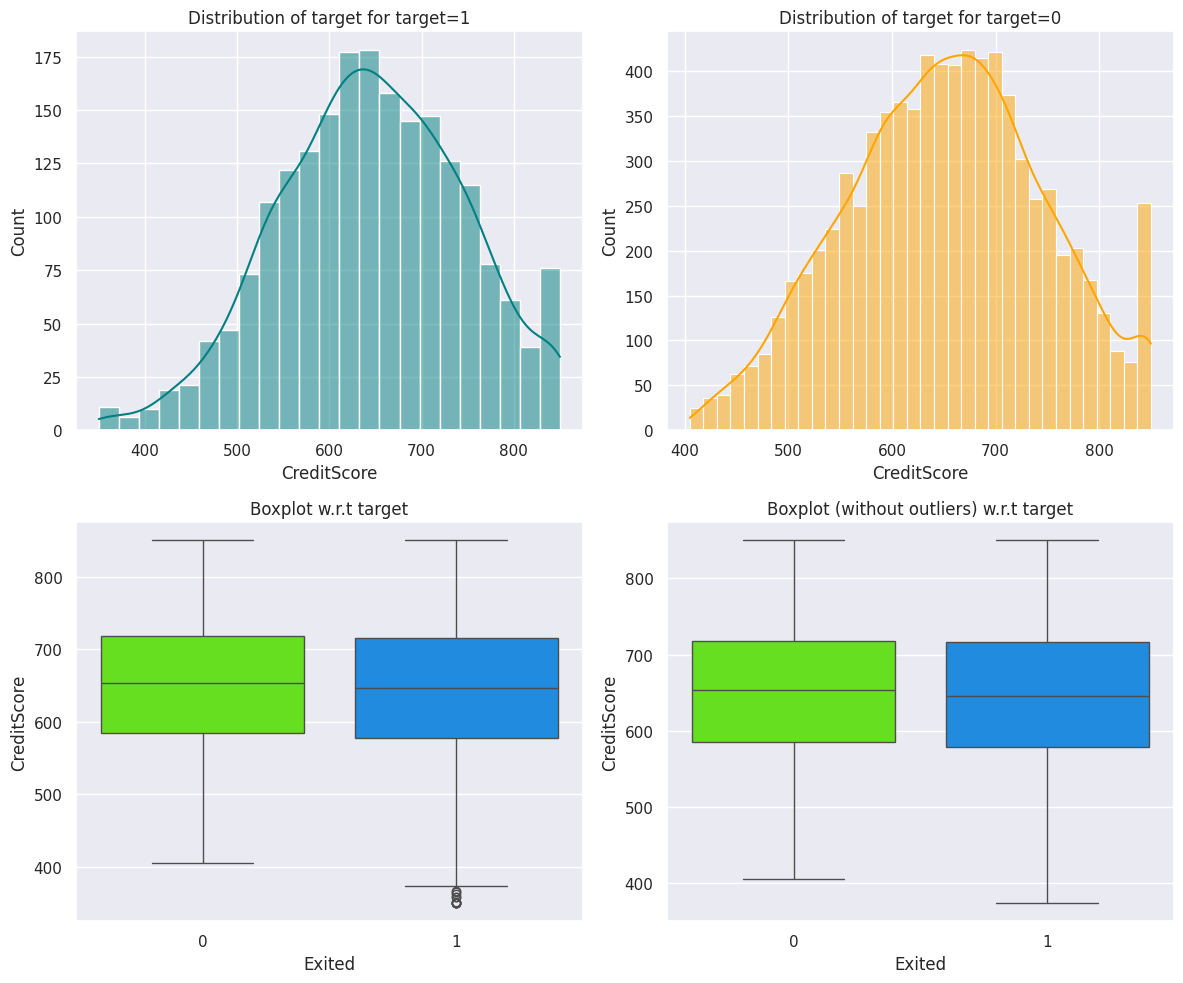

In [42]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

Credit Score Vs Exited seems to have similar behavior for Exited and NOT Exited customers

#### Exited Vs Age

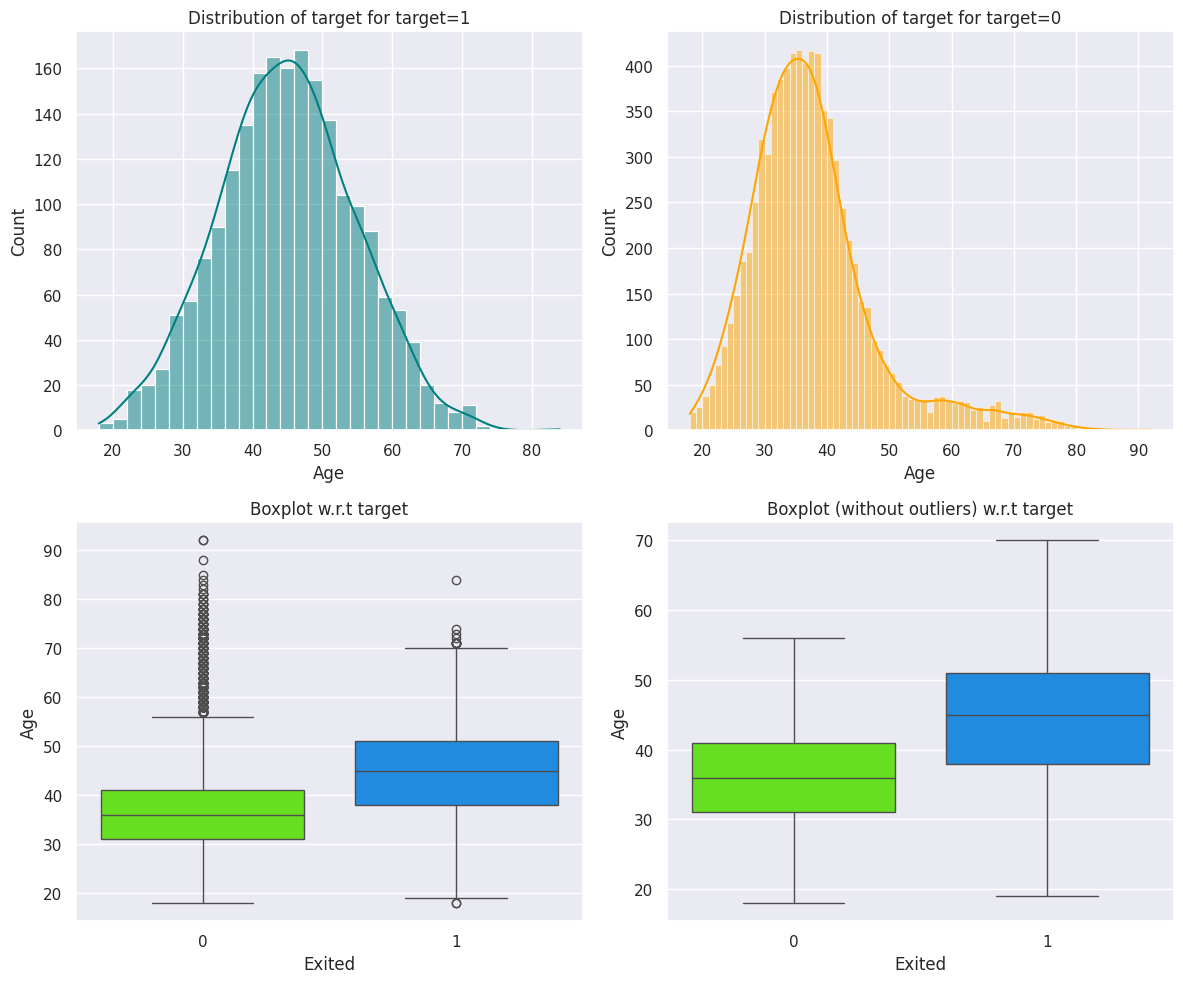

In [43]:
distribution_plot_wrt_target(data, "Age", "Exited")

More Customers below the age of 40 have exited that customers who are more aged.

#### Exited Vs Balance

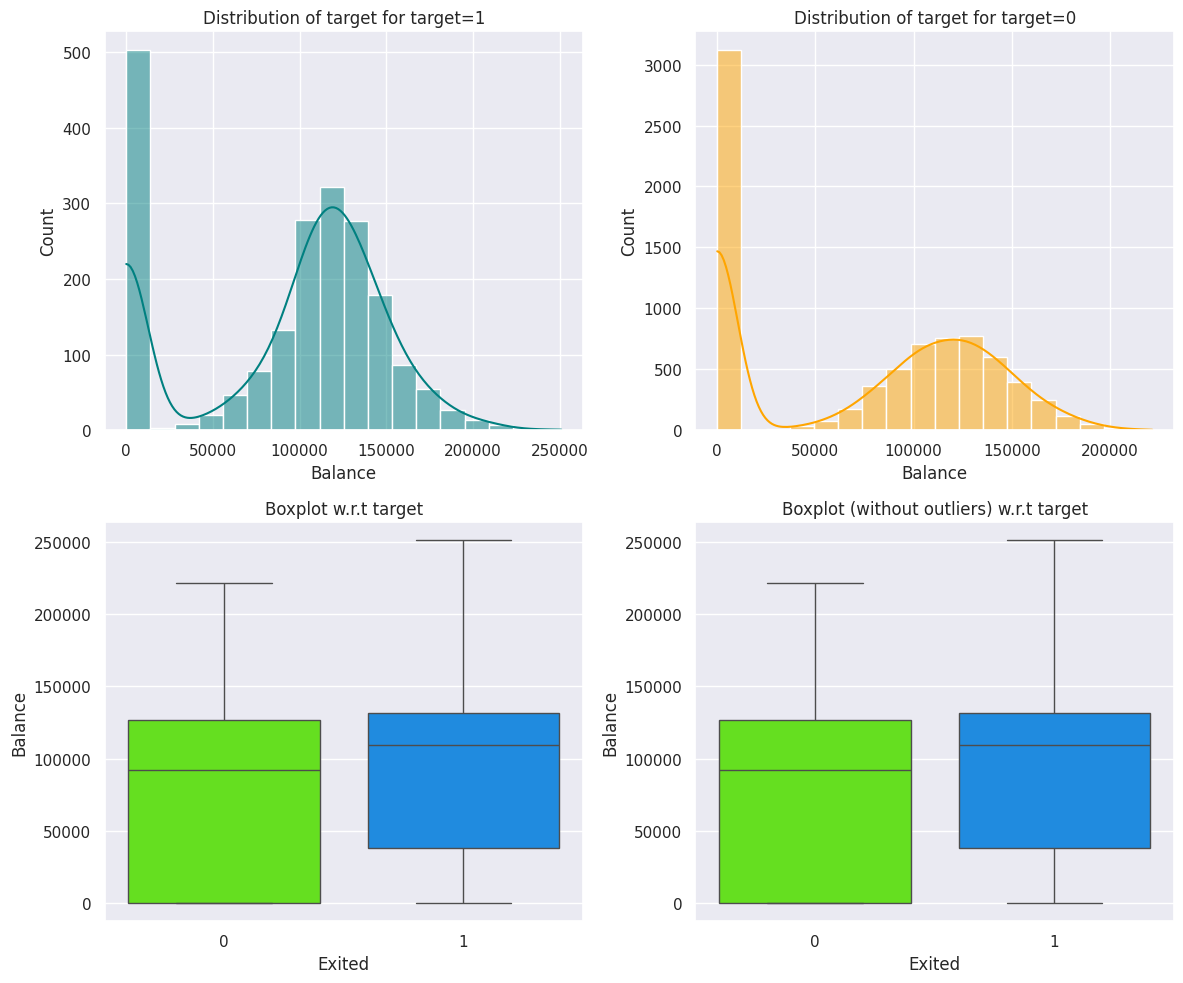

In [44]:
distribution_plot_wrt_target(data, "Balance", "Exited")

Customers have balance of 0. More customers who have balance between 40000 and 120000 have exited.

#### Exited Vs Estimated Salary

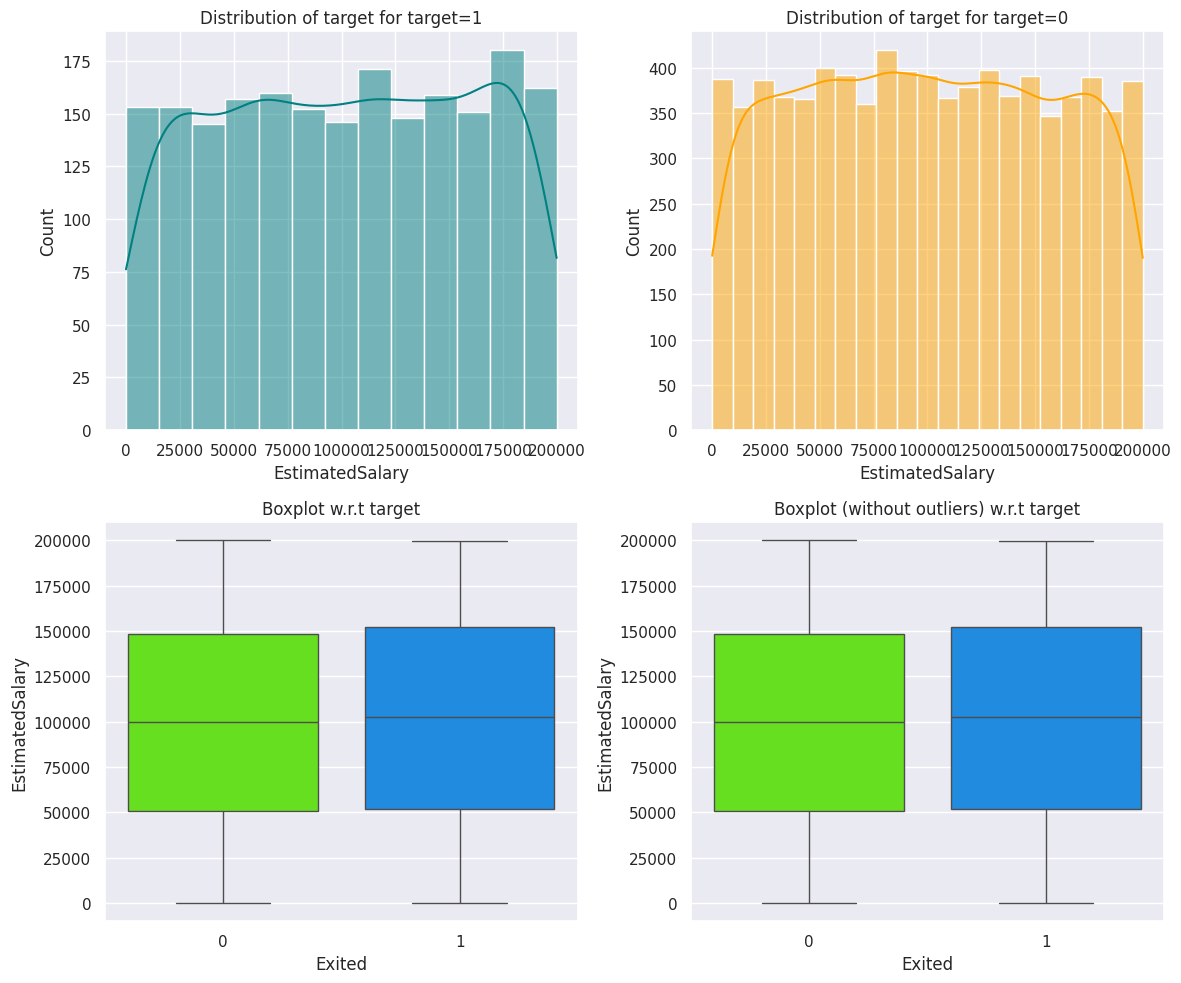

In [45]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

Estimated Salary of Customers have a uniform distribution with respect to Exited value

## Data Preprocessing

### Dummy Variable Creation

In [46]:
# category variable columns
cat_cols = ['Geography','Gender',]


In [47]:
#one hot encoding for category variables
data = pd.get_dummies(data,columns=cat_cols,drop_first=True,dtype=float)

### Train-validation-test Split

In [48]:
X = data.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = data['Exited'] # Exited

In [49]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [50]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


### Data Normalization

In [51]:
#Normalize numerical parameters with Standard Scaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.



The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [53]:
# Create two dataframe to save Training and Validation scores
train_scores = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1'])
val_scores = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1'])

### Utility functions

In [54]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

Define the Batch size and Epochs

In [56]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50
batch_size = 64

### Neural Network with SGD Optimizer

- Let's start with a neural network consisting of
  - two hidden layers with 128 and 64 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [57]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [58]:
#Initializing the neural network
model0 = Sequential()
model0.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model0.add(Dense(64,activation="relu"))
model0.add(Dense(1,activation="sigmoid"))

In [59]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model0.compile(loss='binary_crossentropy', optimizer=optimizer)

In [61]:
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5956 - val_loss: 0.5151
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5136 - val_loss: 0.4881
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4793 - val_loss: 0.4747
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4785 - val_loss: 0.4640
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4753 - val_loss: 0.4555
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4537 - val_loss: 0.4488
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4505 - val_loss: 0.4433
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4344 - val_loss: 0.4387
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4412 - val_loss: 0.4349
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4407 - val_loss: 0.4316
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4460 - val_loss: 0.4288
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4331 - val_l

In [62]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.60591745376587


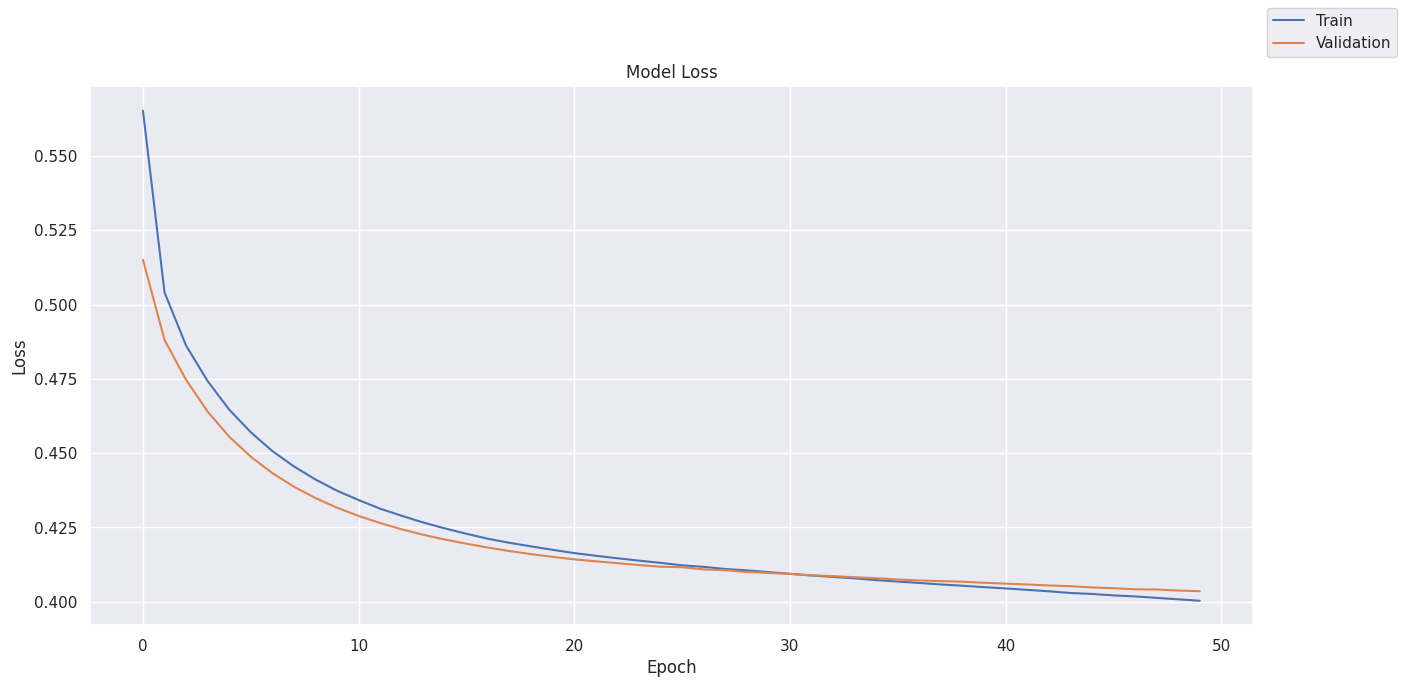

In [63]:
plot(history,'loss')

In [64]:
# Get scores for Model 0 on Training data
model_0_train_perf = model_performance_classification(model0, X_train, y_train)
model_0_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.833833,0.833833,0.819034,0.80562


In [65]:
# Get scores for Model 0 on Validation data
model_0_valid_perf = model_performance_classification(model0, X_val, y_val)
model_0_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.829,0.829,0.812455,0.797847


We observe that the Training Recall is 83.13 % and Validation Recall is 83.15.

Almost same value indicating that the model have learned without overfitting.

## Model Performance Improvement

### Neural Network with SGD Optimizer with Momentum

Lets try building a model with SGD Optmizer and adding Momentum.

In [66]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [67]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(64,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [68]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [70]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5637 - val_loss: 0.4831
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4818 - val_loss: 0.4647
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4817 - val_loss: 0.4525
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4541 - val_loss: 0.4443
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4554 - val_loss: 0.4384
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4502 - val_loss: 0.4342
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4408 - val_loss: 0.4308
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4299 - val_loss: 0.4281
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4367 - val_loss: 0.4258
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4449 - val_loss: 0.4238
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4241 - val_loss: 0.4222
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4240 - val_l

In [71]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.973731994628906


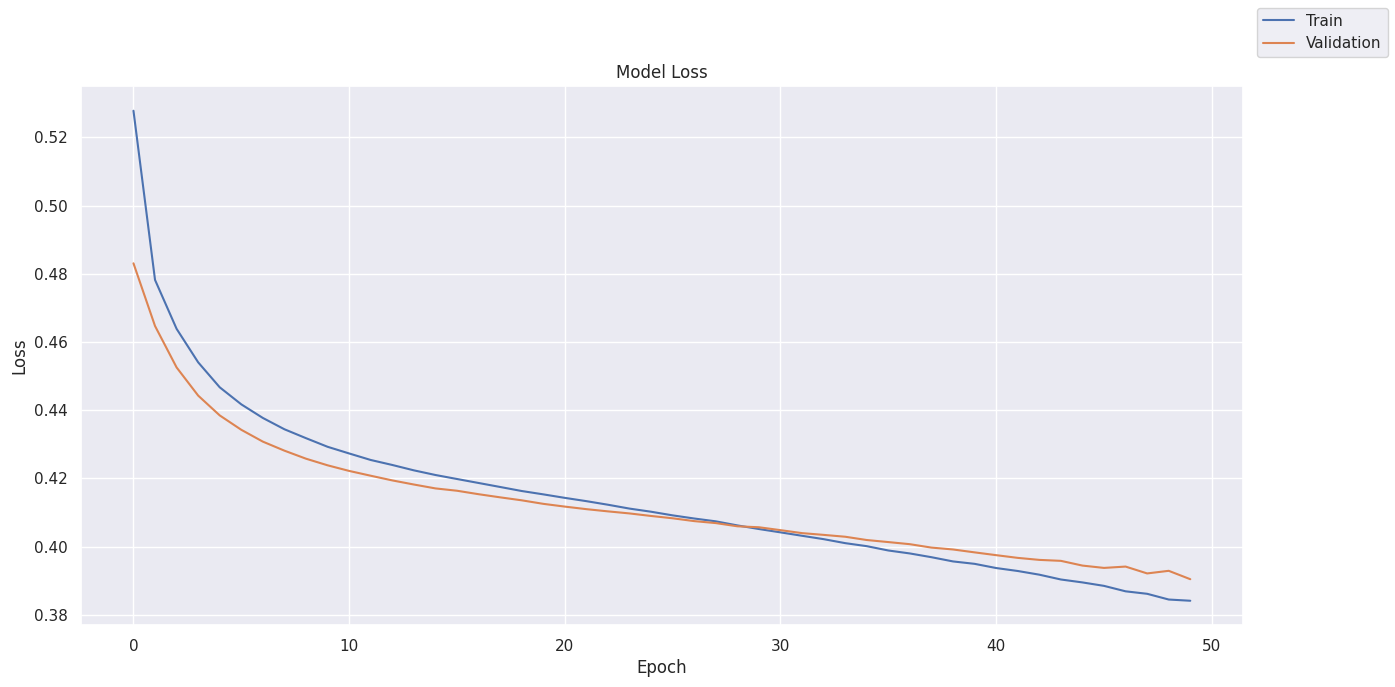

In [72]:
plot(history,'loss')

In [73]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.840167,0.840167,0.828219,0.814391


In [74]:
model_1_valid_perf = model_performance_classification(model1, X_val, y_val)
model_1_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8335,0.8335,0.819176,0.804465


We observe slight increase in Recall for Training data to 84.5 %

Validation data have still Recall of 83.15 %

### Neural Network with Adam Optimizer

- Let's use the Adam optimizer
    - This will introduce momentum as well as an adaptive learning rate

In [75]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [76]:
#Initializing the neural network
model2 = Sequential()
model2.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dense(64,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

In [77]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [79]:
start = time.time()
history = model2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5455 - val_loss: 0.4230
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4187 - val_loss: 0.4093
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3973 - val_loss: 0.3971
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3970 - val_loss: 0.3851
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3755 - val_loss: 0.3741
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3570 - val_loss: 0.3683
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3517 - val_loss: 0.3665
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3452 - val_loss: 0.3583
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3321 - val_loss: 0.3595
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3472 - val_loss: 0.3591
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3336 - val_loss: 0.3574
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3389 - val_l

In [80]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.83785367012024


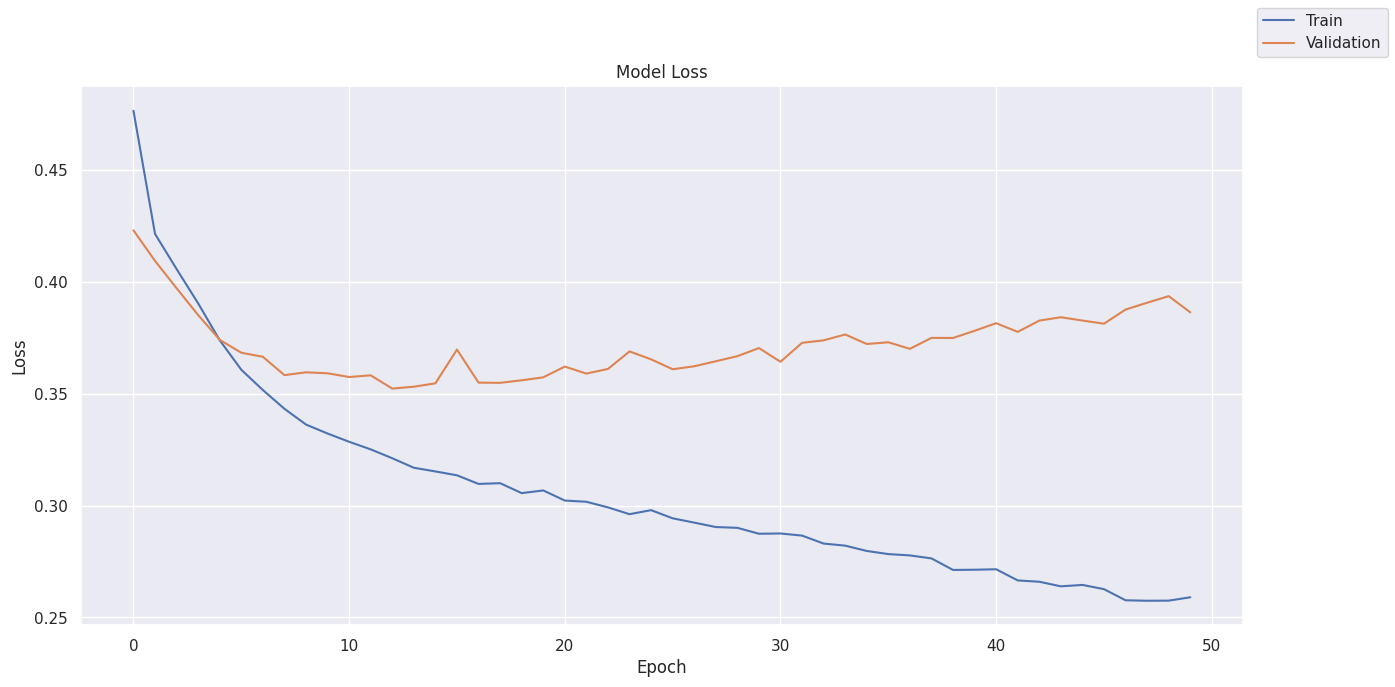

In [81]:
plot(history,'loss')

- After the initial few epochs, the validation loss is oscillating.
    - This indicates that the model is struggling to find the local minima

In [82]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.896667,0.896667,0.892449,0.891232


In [83]:
model_2_valid_perf = model_performance_classification(model2, X_val, y_val)
model_2_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.842,0.842,0.829224,0.831249


By making Adam as optimizer, we observe that Recall score for Training increased to 89.67 % and Validation score to 85.1 %

### Neural Network with Adam Optimizer with Initial learning rate

We will build a model with Adam Optimizer and adding an initial learning rate

In [84]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [85]:
#Initializing the neural network
model3 = Sequential()
model3.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model3.add(Dense(64,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))

In [86]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining Adam as the optimizer to be used
model3.compile(loss='binary_crossentropy', optimizer=optimizer)

In [88]:
start = time.time()
history = model3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6681 - val_loss: 0.5291
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5070 - val_loss: 0.4770
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4729 - val_loss: 0.4567
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4401 - val_loss: 0.4432
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4468 - val_loss: 0.4344
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4305 - val_loss: 0.4279
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4241 - val_loss: 0.4228
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4220 - val_loss: 0.4194
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4119 - val_loss: 0.4160
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4207 - val_loss: 0.4134
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4047 - val_loss: 0.4112
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4103 - val_l

In [89]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.837121963500977


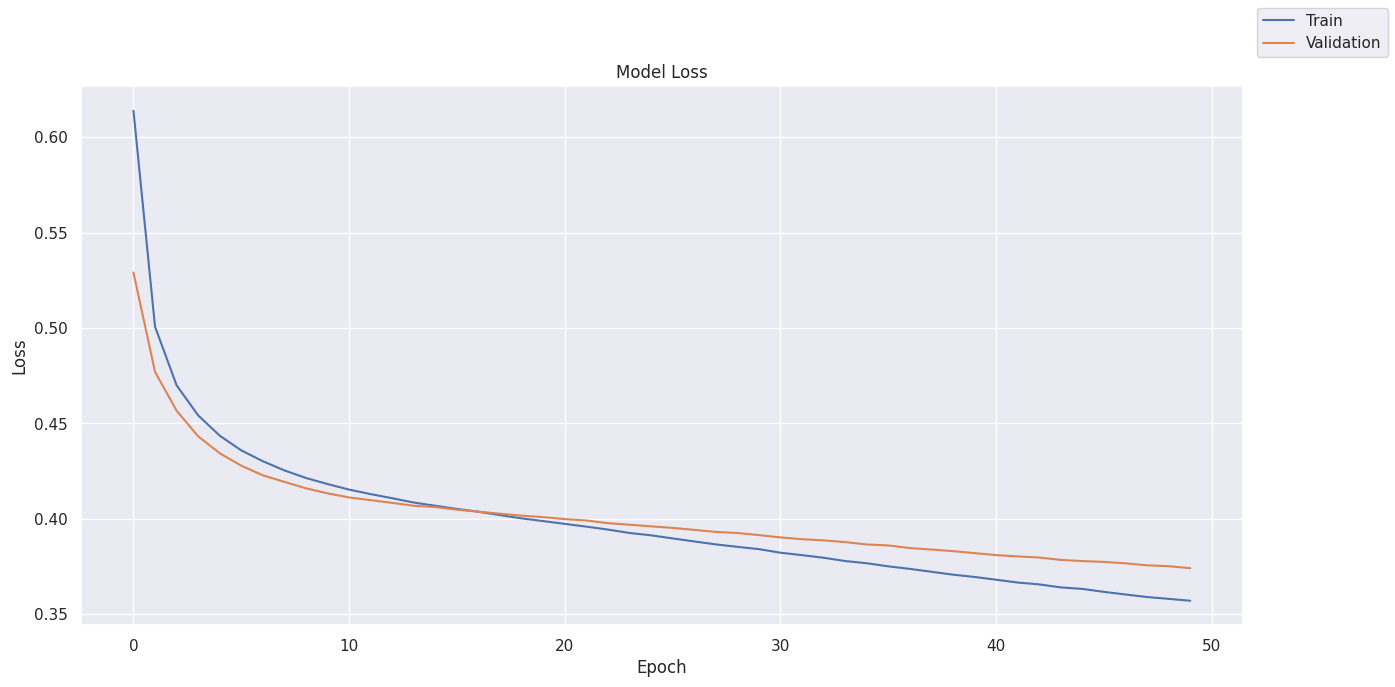

In [90]:
plot(history,'loss')

In [91]:
model_3_train_perf = model_performance_classification(model3, X_train, y_train)
model_3_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.854667,0.854667,0.845532,0.836567


In [92]:
model_3_valid_perf = model_performance_classification(model3, X_val, y_val)
model_3_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8345,0.8345,0.817694,0.813594


The Recall for Training data is 85.3 % and For Validation data it is 83.9 %

### Neural Network with Adam Optimizer and Dropout

Let's add dropout to regularize.

In [93]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [94]:
#Initializing the neural network
model4 = Sequential()
model4.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model4.add(Dropout(0.4))
model4.add(Dense(64,activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation="sigmoid"))

In [95]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer)

In [97]:
start = time.time()
history = model4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5294 - val_loss: 0.4266
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4405 - val_loss: 0.4144
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4141 - val_loss: 0.4096
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4313 - val_loss: 0.4057
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4134 - val_loss: 0.4029
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4117 - val_loss: 0.3940
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4012 - val_loss: 0.3888
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3986 - val_loss: 0.3840
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3954 - val_loss: 0.3782
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3826 - val_loss: 0.3754
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3769 - val_loss: 0.3738
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3896 - val_l

In [98]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.84006118774414


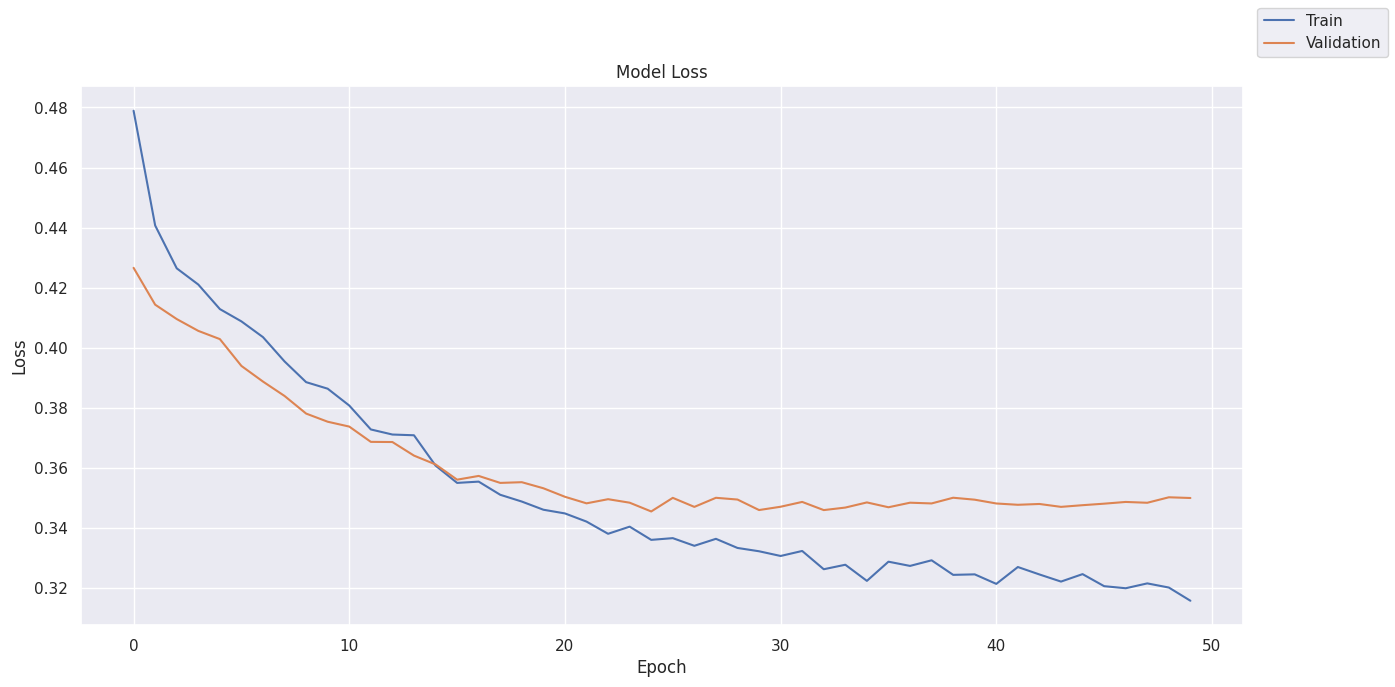

In [99]:
plot(history,'loss')

In [100]:
model_4_train_perf = model_performance_classification(model4, X_train, y_train)
model_4_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.877833,0.877833,0.872316,0.867142


In [101]:
model_4_valid_perf = model_performance_classification(model4, X_val, y_val)
model_4_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8495,0.8495,0.837252,0.835585


The Recall has improved to 87.86 % for Training data and 85.3% for Validation data.

### Neural Network with Adam Optimizer and Dropout and Batch Normalization

Let's add Batch Normalization in addition to adding Dropouts.

In [102]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [103]:
#Initializing the neural network
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
model5 = Sequential()
model5.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))
model5.add(Dense(64,activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1,activation="sigmoid"))

In [104]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [105]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer)

In [106]:
start = time.time()
history = model5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.7333 - val_loss: 0.4912
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5098 - val_loss: 0.4423
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4487 - val_loss: 0.4148
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4388 - val_loss: 0.3941
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3974 - val_loss: 0.3726
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4007 - val_loss: 0.3573
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3725 - val_loss: 0.3564
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3724 - val_loss: 0.3559
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3655 - val_loss: 0.3520
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3540 - val_loss: 0.3537
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3603 - val_loss: 0.3503
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3579 - val_l

In [107]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.82562804222107


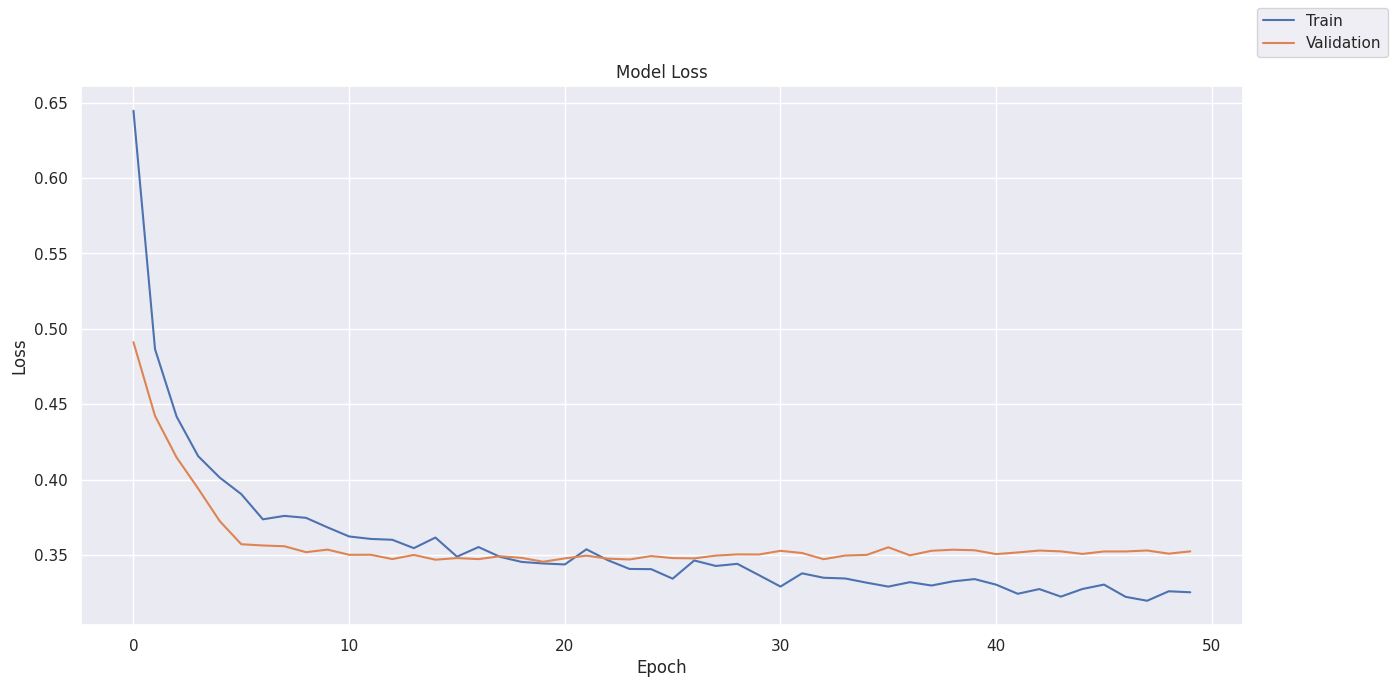

In [108]:
plot(history,'loss')

In [109]:
model_5_train_perf = model_performance_classification(model5, X_train, y_train)
model_5_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.882833,0.882833,0.877496,0.873979


In [110]:
model_5_valid_perf = model_performance_classification(model5, X_val, y_val)
model_5_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8525,0.8525,0.841089,0.840662


We observe that the Recall value improved to 88.28 forTraining data and 84.75 % on Validation data

### Neural Network with Adam Optimizer and Dropout and Batch Normalization and Three  Layers

We will add one more Neural Network Layer to the earlier Model with Batch Normalization and Dropout.

In [111]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [112]:
#Initializing the neural network
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
model6 = Sequential()
model6.add(Dense(128,activation="relu",input_dim=X_train.shape[1]))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))
model6.add(Dense(64,activation="relu"))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(64,activation="relu"))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(1,activation="sigmoid"))

In [113]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,041 (58.75 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 512 (2.00 KB)

In [114]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model6.compile(loss='binary_crossentropy', optimizer=optimizer)

In [115]:
start = time.time()
history = model6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.7589 - val_loss: 0.4955
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5142 - val_loss: 0.4431
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4490 - val_loss: 0.4125
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4215 - val_loss: 0.3756
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4198 - val_loss: 0.3666
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3954 - val_loss: 0.3580
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3880 - val_loss: 0.3469
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3959 - val_loss: 0.3466
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3853 - val_loss: 0.3449
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3689 - val_loss: 0.3454
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3617 - val_loss: 0.3438
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3830 - val_

In [116]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.13726043701172


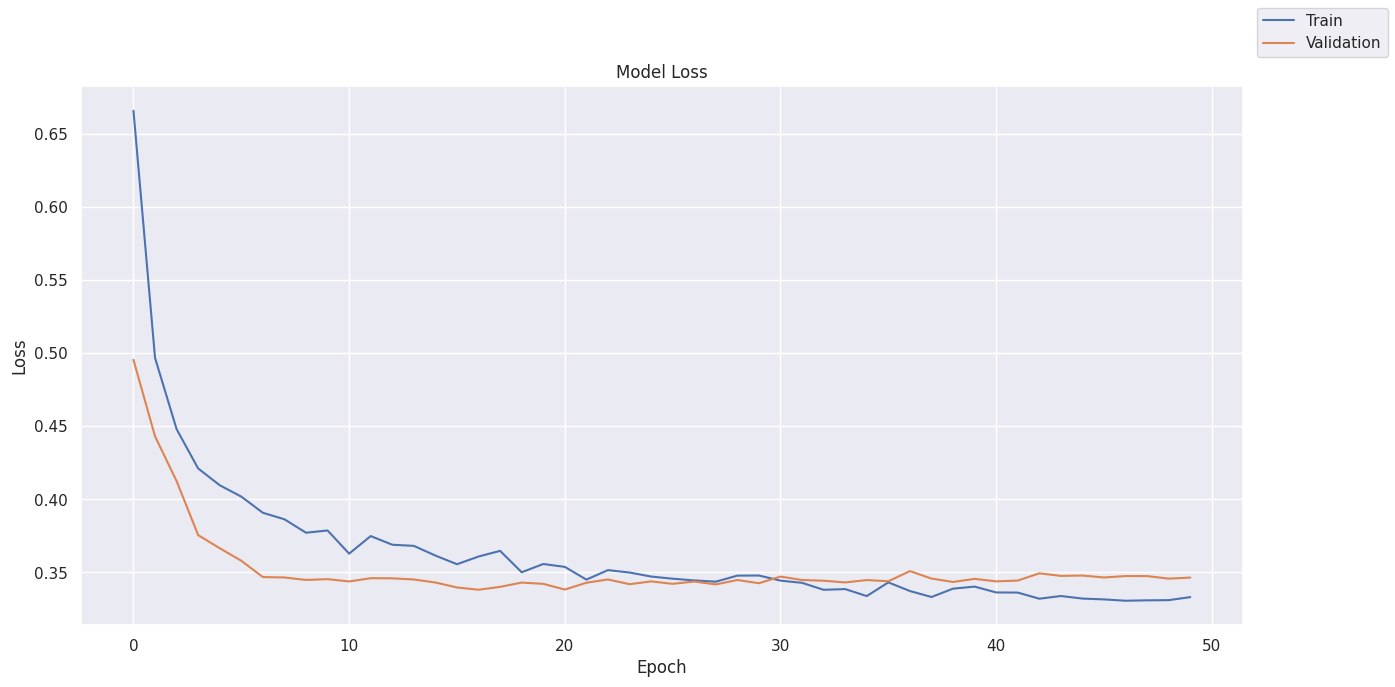

In [117]:
plot(history,'loss')

In [118]:
model_6_train_perf = model_performance_classification(model6, X_train, y_train)
model_6_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.878333,0.878333,0.872825,0.867841


In [119]:
model_6_valid_perf = model_performance_classification(model6, X_val, y_val)
model_6_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8575,0.8575,0.847226,0.844769


We dont see a very high increase in Recall. The value being 87.88 % for Training data and 85.3 % for Validation data.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Lets Balance the data with SMOTE - Oversample the data to match and have same the number of rows for y value - Exited

In [120]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1222
Before Oversampling, counts of label 'No': 4778 

After Oversampling, counts of label 'Yes': 4778
After Oversampling, counts of label 'No': 4778 

After Oversampling, the shape of train_X: (9556, 11)
After Oversampling, the shape of train_y: (9556,) 



- Let's build a neural network consisting of
  - two hidden layers with 128 and 64 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer
  - Oversampled Data using SMOTE

In [121]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [122]:
#Initializing the neural network
model7 = Sequential()
model7.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model7.add(Dense(64,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))

In [123]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model7.compile(loss='binary_crossentropy', optimizer=optimizer)

In [125]:
start = time.time()
history = model7.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6866 - val_loss: 0.6419
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6417 - val_loss: 0.6015
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6120 - val_loss: 0.5800
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5879 - val_loss: 0.5735
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5745 - val_loss: 0.5520
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5704 - val_loss: 0.5471
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5577 - val_loss: 0.5479
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5492 - val_loss: 0.5454
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5423 - val_loss: 0.5413
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5393 - val_loss: 0.5302
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5396 - val_loss: 0.5255
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [126]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.14981484413147


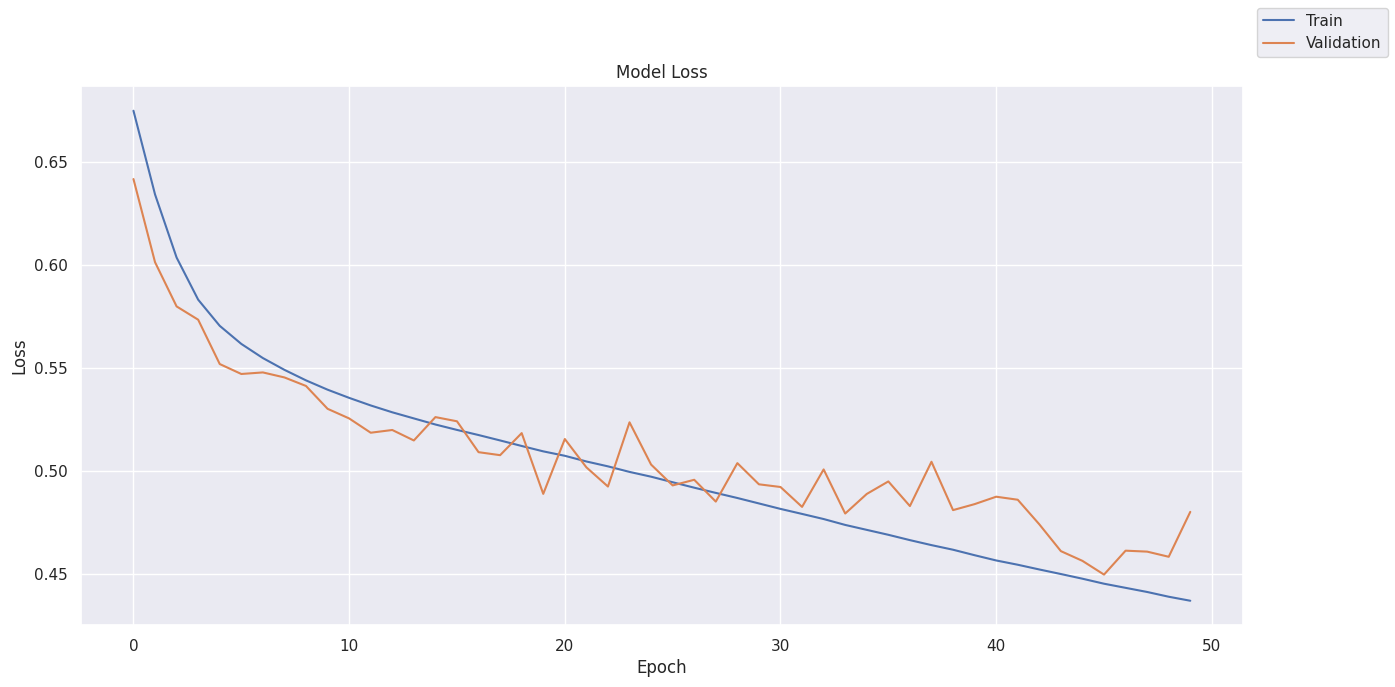

In [127]:
plot(history,'loss')

In [128]:
model_7_train_perf = model_performance_classification(model7, X_train_over, y_train_over)
model_7_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798451,0.798451,0.798659,0.798416


In [129]:
model_7_valid_perf = model_performance_classification(model7, X_val, y_val)
model_7_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.783,0.783,0.833214,0.798243


The recall score for Oversampled Training data is 78.9 % and Validation data is 78.7 %.

The scores seems to be reduced compared to earlier models which were giving better recall scores.

### Neural Network with Balanced Data (SMOTE) and SGD Optimizer with Momentum

We will add SGD Optimizer with Momentum to the Balanced data and print the scores.

In [130]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [131]:
#Initializing the neural network
model8 = Sequential()
model8.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model8.add(Dense(64,activation="relu"))
model8.add(Dense(64,activation="relu"))
model8.add(Dense(1,activation="sigmoid"))

In [132]:
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,017 (54.75 KB)

 Trainable params: 14,017 (54.75 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)    # defining SGD as the optimizer to be used
model8.compile(loss='binary_crossentropy', optimizer=optimizer)

In [134]:
start = time.time()
history = model8.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6867 - val_loss: 0.6385
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6167 - val_loss: 0.5853
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5714 - val_loss: 0.5500
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5556 - val_loss: 0.5083
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5459 - val_loss: 0.5465
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5357 - val_loss: 0.5282
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5199 - val_loss: 0.5532
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5070 - val_loss: 0.4799
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5098 - val_loss: 0.4874
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5049 - val_loss: 0.4915
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4961 - val_loss: 0.4769
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [135]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.692723989486694


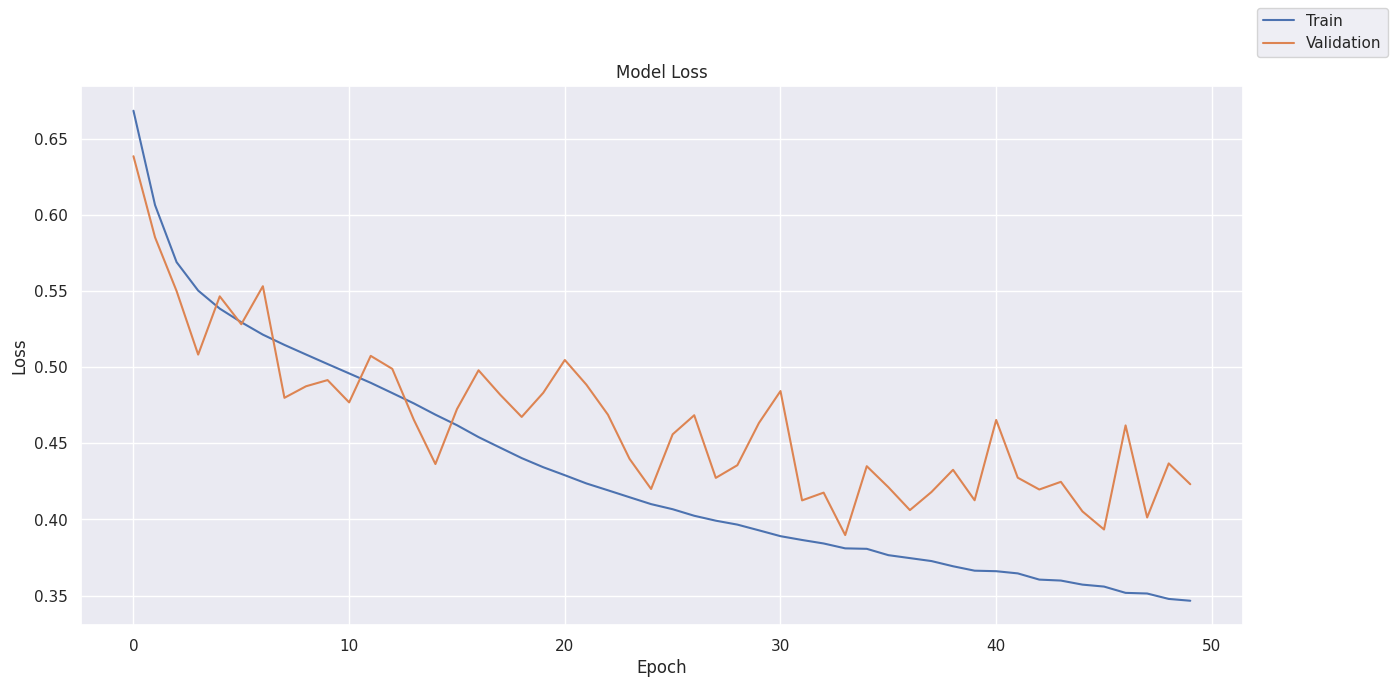

In [136]:
plot(history,'loss')

In [137]:
model_8_train_perf = model_performance_classification(model8, X_train_over, y_train_over)
model_8_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.84753,0.84753,0.848275,0.847449


In [138]:
model_8_valid_perf = model_performance_classification(model8, X_val, y_val)
model_8_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8185,0.8185,0.835474,0.825054


The recall score for Oversampled Training data with SGD with Momentum  is 85.3 % and Validation data is 81.2 %.


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

- Let's change the optimizer to Adam on Balanced Data
    - This will introduce momentum as well as an adaptive learning rate



In [139]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [140]:
#Initializing the neural network
model9 = Sequential()
model9.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model9.add(Dense(64,activation="relu"))
model9.add(Dense(1,activation="sigmoid"))

In [141]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model9.compile(loss='binary_crossentropy', optimizer=optimizer)

In [143]:
start = time.time()
history = model9.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5955 - val_loss: 0.5343
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5081 - val_loss: 0.4575
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4677 - val_loss: 0.4605
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4425 - val_loss: 0.4698
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4198 - val_loss: 0.4166
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4140 - val_loss: 0.4273
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3938 - val_loss: 0.4388
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3939 - val_loss: 0.4217
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3824 - val_loss: 0.4603
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3701 - val_loss: 0.4136
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3688 - val_loss: 0.4828
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [144]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.298304319381714


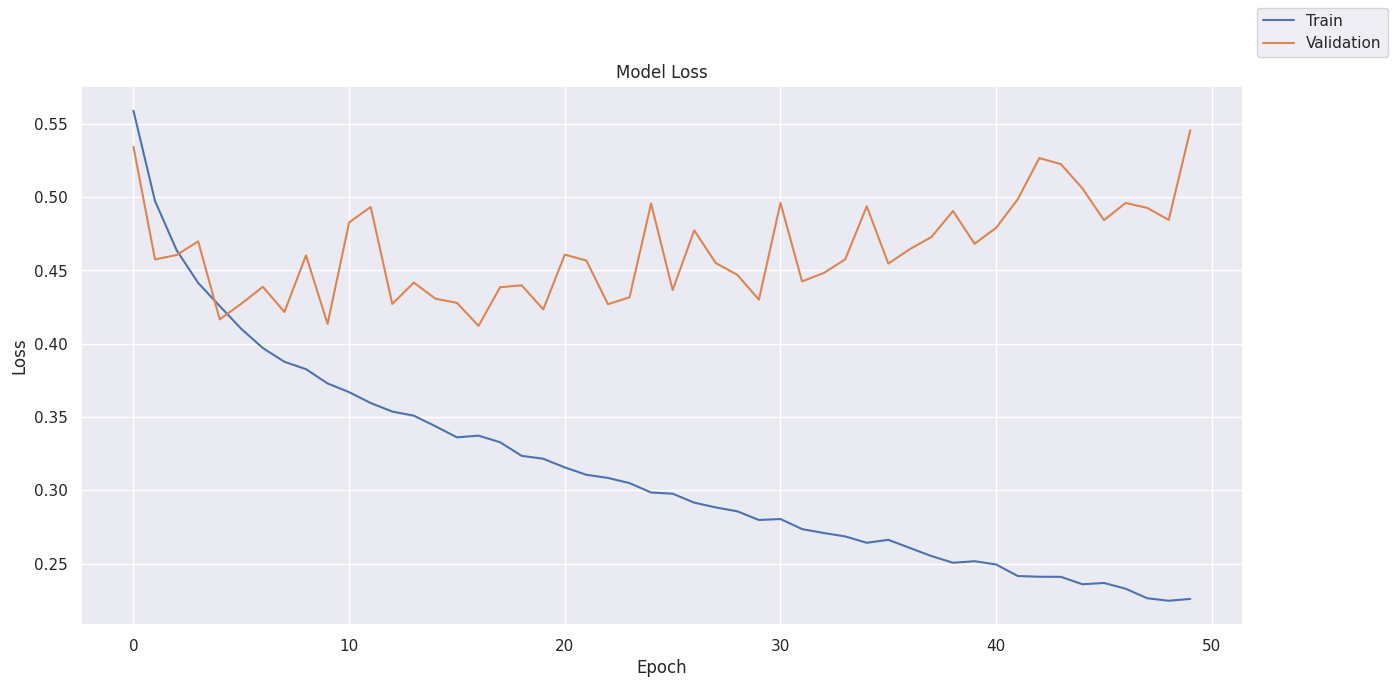

In [145]:
plot(history,'loss')

In [146]:
model_9_train_perf = model_performance_classification(model9, X_train_over, y_train_over)
model_9_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.912411,0.912411,0.914995,0.912275


In [147]:
model_9_valid_perf = model_performance_classification(model9, X_val, y_val)
model_9_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7835,0.7835,0.818335,0.795683


The Recall has a great value of 91.9% on Training data and 81.5% on Validation data

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Lets add dropout to the above Model check the scores

In [148]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [149]:
#Initializing the neural network
model10 = Sequential()
model10.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model10.add(Dropout(0.4))
model10.add(Dense(64,activation="relu"))
model10.add(Dropout(0.2))
model10.add(Dense(1,activation="sigmoid"))

In [150]:
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model10.compile(loss='binary_crossentropy', optimizer=optimizer)

In [152]:
start = time.time()
history = model10.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6332 - val_loss: 0.5152
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5550 - val_loss: 0.5149
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5236 - val_loss: 0.4791
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5017 - val_loss: 0.4838
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5009 - val_loss: 0.4798
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4890 - val_loss: 0.4886
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4776 - val_loss: 0.4337
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4586 - val_loss: 0.4683
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4507 - val_loss: 0.4618
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4480 - val_loss: 0.4330
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4371 - val_loss: 0.4800
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [153]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.58608841896057


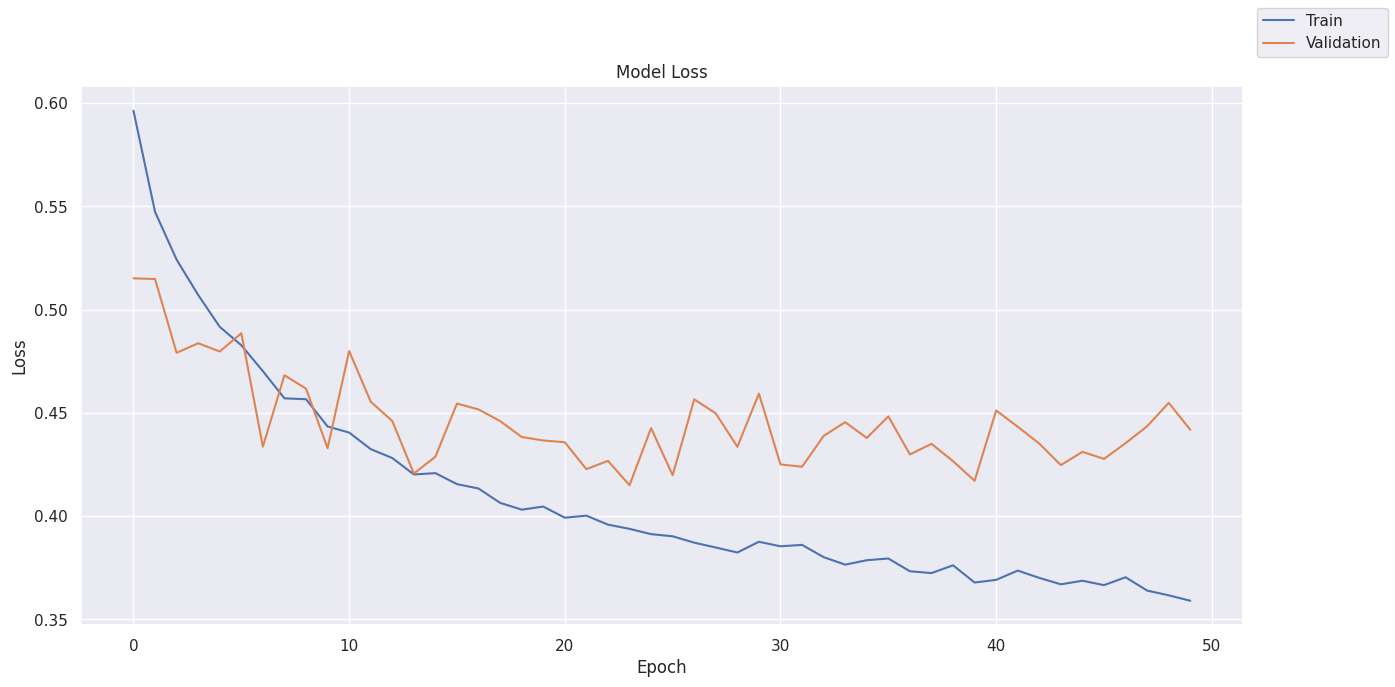

In [154]:
plot(history,'loss')

In [155]:
model_10_train_perf = model_performance_classification(model10, X_train_over, y_train_over)
model_10_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.867099,0.867099,0.867982,0.867019


In [156]:
model_10_valid_perf = model_performance_classification(model10, X_val, y_val)
model_10_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7925,0.7925,0.833655,0.80565


We observe that the Training Recall is now 86.83 for this model and Validation Recall is 81.15%

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer with Initial learning rate

Adding an initial Learning rate for the Adam Optmizer and Observing the model behavior

In [157]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [158]:
#Initializing the neural network
model11 = Sequential()
model11.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model11.add(Dense(64,activation="relu"))
model11.add(Dense(1,activation="sigmoid"))

In [159]:
model11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining Adam as the optimizer to be used
model11.compile(loss='binary_crossentropy', optimizer=optimizer)

In [161]:
start = time.time()
history = model11.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6704 - val_loss: 0.5993
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5994 - val_loss: 0.5622
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5697 - val_loss: 0.5571
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5555 - val_loss: 0.5395
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5428 - val_loss: 0.5249
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307 - val_loss: 0.5445
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5291 - val_loss: 0.5172
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5239 - val_loss: 0.5271
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5077 - val_loss: 0.5198
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5022 - val_loss: 0.5118
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5006 - val_loss: 0.5120
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [162]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.413630962371826


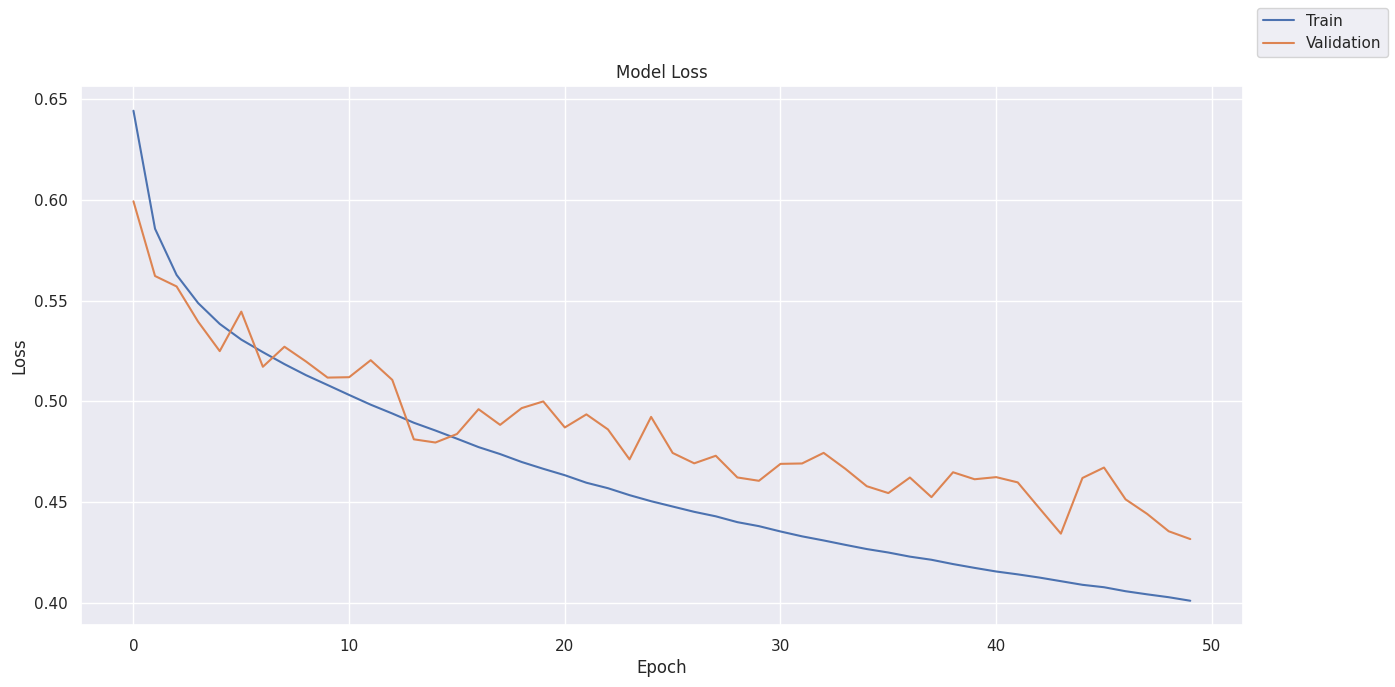

In [163]:
plot(history,'loss')

In [164]:
model_11_train_perf = model_performance_classification(model11, X_train_over, y_train_over)
model_11_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.814148,0.814148,0.814733,0.814062


In [165]:
model_11_valid_perf = model_performance_classification(model11, X_val, y_val)
model_11_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.81,0.81,0.83311,0.818459


The training recall is now 82 % and Validation 78 %

### Neural Network with Adam Optimizer and Dropout and Batch Normalization and Three  Layers and HE Intilization

Lets initialize weight by HE initialization.
We will model using original unbalanced data. We will use Adam Optimizer with Dropout and Batch Normalization.

In [166]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [167]:
#Initializing the neural network
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
model12 = Sequential()
model12.add(Dense(128,activation="relu",input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model12.add(BatchNormalization())
model12.add(Dropout(0.4))
model12.add(Dense(64,activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.2))
model12.add(Dense(64,activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.2))
model12.add(Dense(1,activation="sigmoid"))

In [168]:
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,041 (58.75 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 512 (2.00 KB)

In [169]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model12.compile(loss='binary_crossentropy', optimizer=optimizer)

In [170]:
start = time.time()
history = model12.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7709 - val_loss: 0.4745
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5138 - val_loss: 0.4223
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4556 - val_loss: 0.4005
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4526 - val_loss: 0.3851
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4184 - val_loss: 0.3805
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4220 - val_loss: 0.3685
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4042 - val_loss: 0.3592
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3922 - val_loss: 0.3569
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3998 - val_loss: 0.3545
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3953 - val_loss: 0.3531
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3699 - val_loss: 0.3486
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3918 - val_l

In [171]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.586798667907715


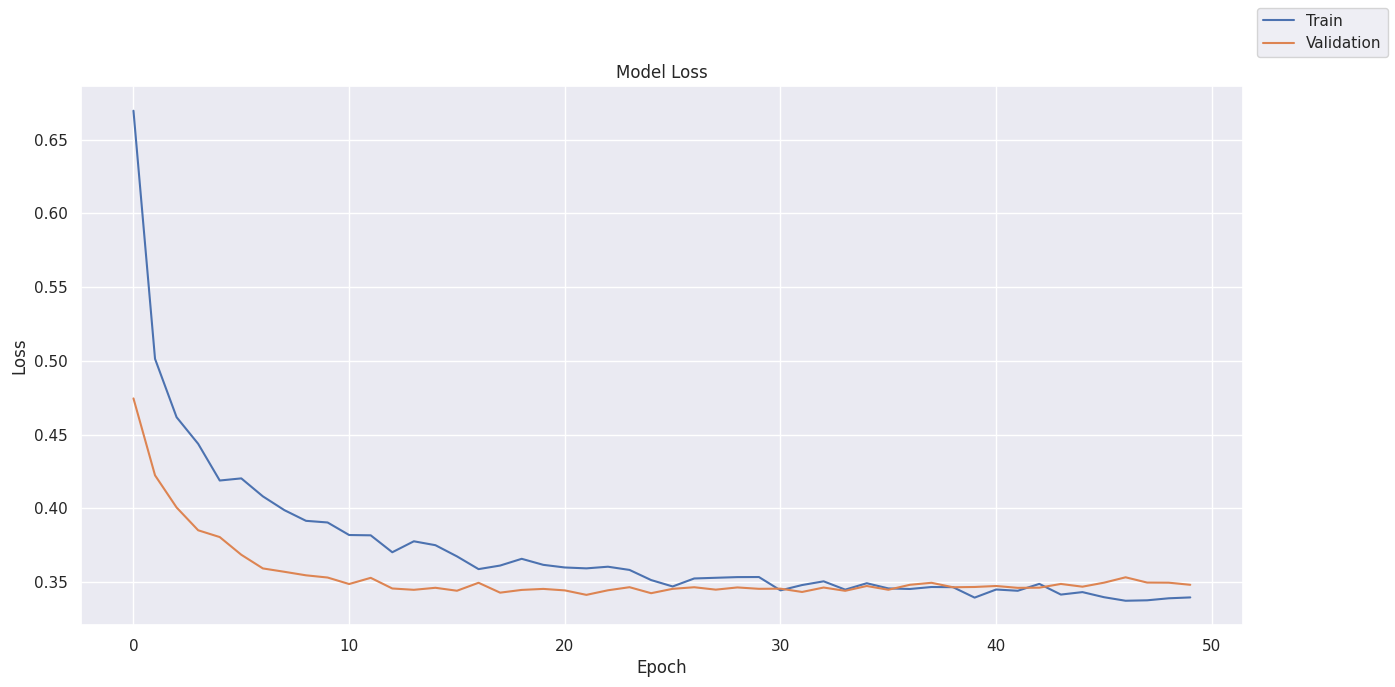

In [172]:
plot(history,'loss')

In [173]:
model_12_train_perf = model_performance_classification(model12, X_train, y_train)
model_12_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.877,0.877,0.870821,0.867011


In [174]:
model_12_valid_perf = model_performance_classification(model12, X_val, y_val)
model_12_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8545,0.8545,0.843532,0.841047


## Model Performance Comparison and Final Model Selection

We will print all the Training Scores and Validation scores and make a comparison

In [175]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T,
        model_10_train_perf.T,
        model_11_train_perf.T,
        model_12_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum = 0.4, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam , Initial learning Rate 1e-4)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (SGD with Momentum = 0.4, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization",
]

In [176]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T,
        model_8_valid_perf.T,
        model_9_valid_perf.T,
        model_10_valid_perf.T,
        model_11_valid_perf.T,
        model_12_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum = 0.4, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam , Initial learning Rate 1e-4)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (SGD with Momentum = 0.4, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)",
    "Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization",
]

In [177]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum = 0.4, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam , Initial learning Rate 1e-4)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)","Neural Network (SGD, SMOTE)","Neural Network (SGD with Momentum = 0.4, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization"
Accuracy,0.833833,0.840167,0.896667,0.854667,0.877833,0.882833,0.878333,0.798451,0.847530,0.912411,0.867099,0.814148,0.877000
Recall,0.833833,0.840167,0.896667,0.854667,0.877833,0.882833,0.878333,0.798451,0.847530,0.912411,0.867099,0.814148,0.877000
Precision,0.819034,0.828219,0.892449,0.845532,0.872316,0.877496,0.872825,0.798659,0.848275,0.914995,0.867982,0.814733,0.870821
F1 Score,0.805620,0.814391,0.891232,0.836567,0.867142,0.873979,0.867841,0.798416,0.847449,0.912275,0.867019,0.814062,0.867011


In [178]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum = 0.4, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam , Initial learning Rate 1e-4)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)","Neural Network (SGD, SMOTE)","Neural Network (SGD with Momentum = 0.4, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)","Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization"
Accuracy,0.829000,0.833500,0.842000,0.834500,0.849500,0.852500,0.857500,0.783000,0.818500,0.783500,0.792500,0.810000,0.854500
Recall,0.829000,0.833500,0.842000,0.834500,0.849500,0.852500,0.857500,0.783000,0.818500,0.783500,0.792500,0.810000,0.854500
Precision,0.812455,0.819176,0.829224,0.817694,0.837252,0.841089,0.847226,0.833214,0.835474,0.818335,0.833655,0.833110,0.843532
F1 Score,0.797847,0.804465,0.831249,0.813594,0.835585,0.840662,0.844769,0.798243,0.825054,0.795683,0.805650,0.818459,0.841047


In [185]:
(models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]).sort_values()

,Recall
"Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)",0.004148
"Neural Network (SGD, No Regularization)",0.004833
"Neural Network (SGD with Momentum = 0.4, No Regularization)",0.006667
"Neural Network (SGD, SMOTE)",0.015451
"Neural Network (Adam , Initial learning Rate 1e-4)",0.020167
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)",0.020833
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization",0.022500
"Neural Network (Adam, dropout [0.4,0.2])",0.028333
"Neural Network (SGD with Momentum = 0.4, SMOTE)",0.029030
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)",0.030333


In [182]:
models_train_comp_df.loc["Recall"].sort_values(ascending=False)

,Recall
"Neural Network (Adam, SMOTE)",0.912411
"Neural Network (Adam , No Regularization)",0.896667
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)",0.882833
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)",0.878333
"Neural Network (Adam, dropout [0.4,0.2])",0.877833
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization",0.877000
"Neural Network (Adam,dropout [0.4,0.2] ,SMOTE)",0.867099
"Neural Network (Adam , Initial learning Rate 1e-4)",0.854667
"Neural Network (SGD with Momentum = 0.4, SMOTE)",0.847530
"Neural Network (SGD with Momentum = 0.4, No Regularization)",0.840167


In [184]:
models_valid_comp_df.loc["Recall"].sort_values(ascending=False)

,Recall
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers)",0.8575
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization",0.8545
"Neural Network (Adam, dropout [0.4,0.2], Batch Normalization)",0.8525
"Neural Network (Adam, dropout [0.4,0.2])",0.8495
"Neural Network (Adam , No Regularization)",0.8420
"Neural Network (Adam , Initial learning Rate 1e-4)",0.8345
"Neural Network (SGD with Momentum = 0.4, No Regularization)",0.8335
"Neural Network (SGD, No Regularization)",0.8290
"Neural Network (SGD with Momentum = 0.4, SMOTE)",0.8185
"Neural Network (Adam,dropout [0.4,0.2] ,SMOTE,Initial learning Rate 1e-4)",0.8100


Comparing the Training scores, Validation scores and the difference between training and Validation scores, We see that the model - Neural Network (Adam, dropout [0.4,0.2], Batch Normalization, Three Layers, HE Intilization-  has the better performance keeping in mind score values and not overfitted.

Training Recall : 87.83 %

Validation Recall : 85.45 %

### Final Model

In [190]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [191]:
#Initializing the neural network
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [192]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,041 (58.75 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 512 (2.00 KB)

In [193]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [194]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.7657 - val_loss: 0.4833
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5218 - val_loss: 0.4210
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4617 - val_loss: 0.3960
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4447 - val_loss: 0.3881
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4112 - val_loss: 0.3711
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4236 - val_loss: 0.3624
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4143 - val_loss: 0.3582
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3870 - val_loss: 0.3538
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3886 - val_loss: 0.3488
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3959 - val_loss: 0.3494
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3694 - val_loss: 0.3475
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3772 - val_l

In [195]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.78714942932129


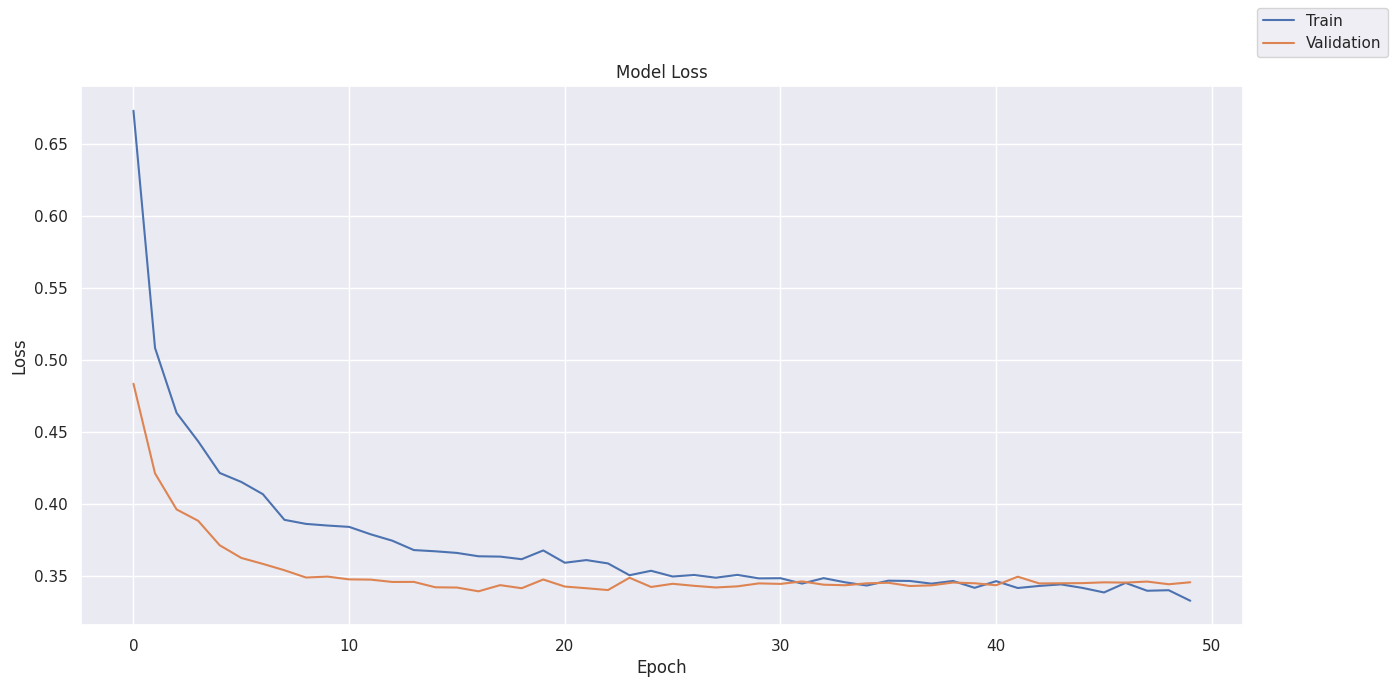

In [196]:
plot(history,'loss')

In [198]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [207]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      4778
           1       0.79      0.54      0.64      1222

    accuracy                           0.88      6000
   macro avg       0.84      0.75      0.78      6000
weighted avg       0.87      0.88      0.87      6000



In [201]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1592
           1       0.71      0.48      0.57       408

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [202]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



We see that the Scores for Training, Validation and Test data are comparable and have a good percentage. So the model is not overfitted or underfitted and may be the Selected best model in the models tried so far.

Weighted Average Recall on Test data is 86%

## Actionable Insights and Business Recommendations

Bank had gathered 14 parameters out of which 3 were dropped since it was not adding value to the data.
Analyzing the 9 available parameters, here are the Actionable Insights and Business Recommendations -



1.   More Customers from Germany have exited. It is recomemnded to focus more on retaining German custoemrs.
2.   25 % of Female Customers have exited as compared to 16.5 % of the Male customers. Hence Offers could be provided more for female customers so that they are retained.
3.   26.9% of Customers who are not Active have exited as compared to 14.3 % exited for customers who are active. Check for customers who are not active and contact them to be more actively involved with the bank and thereby reducing their exit.
4. All Customers with 4 products have exited. Hence recommendation is to focus more on Customers with more products from bank who have a tendency to exit.
5. More Customers below the age of 40 have exited that customers who are more aged. Promotions can be started for young customers and in that way reduce their exit.





<font size=6 color='blue'>Power Ahead</font>
___